In [1]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 123934 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.6) ...


In [3]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 123939 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 36.3 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=e850b2e56cbaaea7b78b23e9f6c1d2d6b5f256bfaef72a1f1e7ce96aaacf5943
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [4]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 25.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 45.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 65.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 47.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 56.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.6 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37

In [6]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 453 kB 40.5 MB/s 


## 2. 영화 리뷰 데이터에 대한 이해와 전처리

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1) 데이터 로드하기

위 링크로부터 훈련 데이터에 해당하는 ratings_train.txt와 테스트 데이터에 해당하는 ratings_test.txt를 다운로드합니다.

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
# import pandas as pd
# raw_data = pd.read_excel('/content/gdrive/MyDrive/대회/감정분석 대회/train_label_data.xlsx')
# # test_data = pd.read_table('ratings_test.txt')

# raw_data.info()


In [10]:
# raw_data2 = pd.read_excel('/content/gdrive/MyDrive/대회/감정분석 대회/감성대화말뭉치(최종데이터)_Training.xlsx')
# raw_data3 = pd.read_excel('/content/gdrive/MyDrive/대회/감정분석 대회/감성대화말뭉치(최종데이터)_Validation.xlsx')

In [11]:
# raw_data2['감정_대분류'].unique()

In [ ]:
# raw_data3['감정_대분류'].unique()

In [ ]:
# def change_class(label):
#   if label == '기쁨':
#     label='euphoria'
#     return label
#   else:
#     label = 'dysphoria'
#     return label

In [ ]:
# type(raw_data3['감정_대분류'][0])

In [ ]:
# a = raw_data3['감정_대분류'].apply(change_class)
# a.value_counts()

In [ ]:
# a = raw_data2['감정_대분류'].apply(change_class)
# a.value_counts()

In [ ]:
# tsv_file=r'/content/gdrive/MyDrive/대회/감정분석 대회/df_train_extended.tsv'
# csv_table=pd.read_table(tsv_file,sep='\t')
# csv_table
# # csv_table.to_excel('train_data.xlsx',index=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sentence_id,person,sentence,scene,context,target_speaker_ctx,other_speaker_ctx,scene_sents
0,1,어영,야! 전화 받아. 아무리 바빠도 내전화는 받아야 되는거 아냐? 약속 하나도 못지키는...,S0104,NaN,,,
1,2,어영,우리 아무래도 안되겠다. 이게 최선인거 같애. 평생 잊지 않을게. 행복하길 바란다.,S0108,"포기한듯 탁 일어서는데, 띵동 문자. 후다닥 보는 어영. 기막혀 읽어보는",,,
2,3,지구대,"김경사님, 아직 안가셨어요? 시간 다됐을텐데.",S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,,,
3,4,순경,근무중인데 어딜가?,S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,,"김경사님, 아직 안가셨어요? 시간 다됐을텐데.","김경사님, 아직 안가셨어요? 시간 다됐을텐데."
4,5,지구대,다녀오세요. 이런날은 무조건 가서 축하해주셔야죠. 이순경이 대신 근무선다고 나온대요.,S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,"김경사님, 아직 안가셨어요? 시간 다됐을텐데.",근무중인데 어딜가?,"김경사님, 아직 안가셨어요? 시간 다됐을텐데.근무중인데 어딜가?"
...,...,...,...,...,...,...,...,...
99352,104303,윤찬,내가 게을러서 다른 방법을 아직 생각하진 못했어. 댄스 동호회는 좀 괜찮은 것 같은...,SG_104302,NaN,,연애하고 싶은데 소개팅만 나가면 꽝이야. 이러다가 난 결혼 못 하고 늙어 죽을 거야.,연애하고 싶은데 소개팅만 나가면 꽝이야. 이러다가 난 결혼 못 하고 늙어 죽을 거야.
99353,104304,용준,은행 대출이 막혀서 생활비를 구할 수가 없어. 이제 어떻게 살아야 하나 막막해.,SG_104304,NaN,,,
99354,104305,한별,당장 내일 밥은 어떡하고 내 병원비는 어쩌지.,SG_104304,NaN,,은행 대출이 막혀서 생활비를 구할 수가 없어. 이제 어떻게 살아야 하나 막막해.,은행 대출이 막혀서 생활비를 구할 수가 없어. 이제 어떻게 살아야 하나 막막해.
99355,104306,동욱,자식들은 키워 준 은혜도 모르고 내게 오지도 않네. 너무 외롭고 슬퍼.,SG_104306,NaN,,,


In [ ]:
# train_table = csv_table['sentence']

In [163]:
# train_table=pd.read_csv('/content/gdrive/MyDrive/대회/감정분석 대회/SGwannabe_train_set_4403.csv')
# train_table = train_table[['sentence', 'label']]
# train_table

,sentence,label
0,엄마 왜 종남이만 많이 줘? 내거야.,dysphoria
1,또 그놈의 잔소리.,dysphoria
2,너한테 무슨말 안하디?,neutral
3,"아, 오빠만 보면 삘이팍! 온다구요.",euphoria
4,태워주긴 뭘 태워줘? 걸어서 가. 부영이 앞으로 언니 신경 안쓰이게 니할일 딱딱 하...,dysphoria
...,...,...
4398,안잤다니?,neutral
4399,자네딸 데려다 직싸게 고생시키면서 두고두고 복수할려고. 이의 없지?,euphoria
4400,응. 들어가라.,neutral
4401,이럴때 핸드폰 하나있으면 얼마나 좋아? 나다. 너 지금 어디야?,dysphoria


In [9]:
train_table=pd.read_csv('/content/gdrive/MyDrive/대회/감정분석 대회/SGwannabe_train_set_4403.csv')
train_table = train_table[['sentence','context', 'target_speaker_ctx','other_speaker_ctx',	 'label']]
train_table

,sentence,context,target_speaker_ctx,other_speaker_ctx,label
0,엄마 왜 종남이만 많이 줘? 내거야.,상태보면 종남접시에 좀더 많이 담긴,,"자, 똑같이 나눴으니까 싸우지들 말고 먹어.",dysphoria
1,또 그놈의 잔소리.,마지못해 반찬꺼내 상차리는 과자. 들오는 순경. 뒤따라 현찰,사연을 말하자면 너무 길어서 밤을 새도 모자라니 넘어갑시다. 니가 알지 내가 아냐...,아침에 해가 분명 동쪽에서 뜨던데. 오늘부터 살림연습 들어갔어? 못한다고 딱 잡아...,dysphoria
2,너한테 무슨말 안하디?,저녁먹던중. 들어와 앉는 범인부영,언니 먹을것좀 해줘야겠다.,요새 힘든가봐요.,neutral
3,"아, 오빠만 보면 삘이팍! 온다구요.",할수없이 청난옆에 앉는 건강. 좋아서 얼른 팔짱끼는 청난. 슬쩍 빼내는 건강. 청난...,"도련님하고 저하고 삘이 통하네요. 오빠. 아버님, 오빠가 저 이렇게 했어요. 뭐요?",문부서지겠다. 그렇게 좋다니? 들어와 앉아. 예 아부지. 아 아닙니다. 내가 언제...,euphoria
4,태워주긴 뭘 태워줘? 걸어서 가. 부영이 앞으로 언니 신경 안쓰이게 니할일 딱딱 하...,신문보는 범인. 찻잔놓는 솔이. 이층에서 어영의 노랫소리. 슥보는 범인,벌써 나가게? 너 괜찮니? 쓸데없이. 어영아. 일루 잠깐 앉아봐. 일부러 이럴필요...,먼일인지 아주 신바람이 났시유. 예 아부지. 일찍 일어나서 운동도 하고 책상 정리...,dysphoria
...,...,...,...,...,...
4398,안잤다니?,"다시 기어들오는 과자. 이상것 놓고, 찾다가 건강 베개맡에 있던 핸펀 발견. 나가려...",,엄마. 아까부터 뭐하고 돌아다녀?,neutral
4399,자네딸 데려다 직싸게 고생시키면서 두고두고 복수할려고. 이의 없지?,허겁지겁 들오는 범인. 앉은 순경,"자네 딸, 비행기 못탔어. 내가 붙잡았어. 지금 우리 아들이랑 같이 있네. 첨엔 ...",무슨 일입니까? 전화받자마자 쫓아왔습니다. 그게 무슨 소립니까? 아까 분명 공항이...,euphoria
4400,응. 들어가라.,들오는 이상. 현찰은 속상해 애들방앞에 걸터앉은,,"작은형, 아직 안늦었지?",neutral
4401,이럴때 핸드폰 하나있으면 얼마나 좋아? 나다. 너 지금 어디야?,수화기 들고 번호누르는데 부르르,,,dysphoria


In [13]:
tsv_file=r'/content/gdrive/MyDrive/대회/감정분석 대회/df_train_extended.tsv'
csv_table =pd.read_table(tsv_file,sep='\t')
csv_table = csv_table[7339:]
csv_table = csv_table[['sentence']]
csv_table

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sentence
7339,아내가 드디어 출산하게 되어서 정말 신이 나.
7340,아 지금 정말 신이 나.
7341,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.
7342,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.
7343,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.
...,...
99352,내가 게을러서 다른 방법을 아직 생각하진 못했어. 댄스 동호회는 좀 괜찮은 것 같은...
99353,은행 대출이 막혀서 생활비를 구할 수가 없어. 이제 어떻게 살아야 하나 막막해.
99354,당장 내일 밥은 어떡하고 내 병원비는 어쩌지.
99355,자식들은 키워 준 은혜도 모르고 내게 오지도 않네. 너무 외롭고 슬퍼.


In [14]:
csv_label = pd.read_csv('/content/gdrive/MyDrive/대회/감정분석 대회/train_labels.csv')
csv_label = csv_label[7339:]
csv_label = csv_label[['label']]

csv_label

,label
7339,euphoria
7340,euphoria
7341,dysphoria
7342,dysphoria
7343,dysphoria
...,...
99352,dysphoria
99353,dysphoria
99354,dysphoria
99355,dysphoria


In [15]:
train_table1 = pd.concat([csv_table, csv_label], axis=1)
train_table1

,sentence,label
7339,아내가 드디어 출산하게 되어서 정말 신이 나.,euphoria
7340,아 지금 정말 신이 나.,euphoria
7341,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,dysphoria
7342,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,dysphoria
7343,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,dysphoria
...,...,...
99352,내가 게을러서 다른 방법을 아직 생각하진 못했어. 댄스 동호회는 좀 괜찮은 것 같은...,dysphoria
99353,은행 대출이 막혀서 생활비를 구할 수가 없어. 이제 어떻게 살아야 하나 막막해.,dysphoria
99354,당장 내일 밥은 어떡하고 내 병원비는 어쩌지.,dysphoria
99355,자식들은 키워 준 은혜도 모르고 내게 오지도 않네. 너무 외롭고 슬퍼.,dysphoria


In [16]:
train_table_concat = pd.concat([train_table,train_table1], axis = 0)
train_table_concat

,sentence,label
0,엄마 왜 종남이만 많이 줘? 내거야.,dysphoria
1,또 그놈의 잔소리.,dysphoria
2,너한테 무슨말 안하디?,neutral
3,"아, 오빠만 보면 삘이팍! 온다구요.",euphoria
4,태워주긴 뭘 태워줘? 걸어서 가. 부영이 앞으로 언니 신경 안쓰이게 니할일 딱딱 하...,dysphoria
...,...,...
99352,내가 게을러서 다른 방법을 아직 생각하진 못했어. 댄스 동호회는 좀 괜찮은 것 같은...,dysphoria
99353,은행 대출이 막혀서 생활비를 구할 수가 없어. 이제 어떻게 살아야 하나 막막해.,dysphoria
99354,당장 내일 밥은 어떡하고 내 병원비는 어쩌지.,dysphoria
99355,자식들은 키워 준 은혜도 모르고 내게 오지도 않네. 너무 외롭고 슬퍼.,dysphoria


In [164]:
# test_table=pd.read_csv('/content/gdrive/MyDrive/대회/감정분석 대회/SGwannabe_validation_set_2936.csv')
# test_table = test_table[['sentence', 'label']] 
# test_table 


,sentence,label
0,같이 가.,euphoria
1,"이런식으로 가르치니 발전이 없죠. 격투기라는게 말 그대로 싸우는 기술인데, 실전에 ...",dysphoria
2,너 괜찮니?,euphoria
3,딸이 둘인가 있었는데...찾을려고 맘먹으면 경찰이 왜 못찾겠냐만은...,dysphoria
4,사채 썼다며. 아주 떡대같은 놈들이 찾아와서 협박하고 가드라. 모르는 소리야?,dysphoria
...,...,...
2931,알았어.,dysphoria
2932,그래? 그럼 내가 올라가서 음식이라도 좀 해줄까?,dysphoria
2933,무슨 일로 집합시켰어?,neutral
2934,부킹해서 첨만난게 아냐?,dysphoria


In [10]:
test_table=pd.read_csv('/content/gdrive/MyDrive/대회/감정분석 대회/SGwannabe_validation_set_2936.csv')
test_table = test_table[['sentence','context', 'target_speaker_ctx','other_speaker_ctx',	 'label']] 
test_table 


,sentence,context,target_speaker_ctx,other_speaker_ctx,label
0,같이 가.,현찰 이미 좀 취한,그래. 그래서 니 별명이 딱지대장이었잖아. 어떻게 그렇게 딱지를 잘치는지. 맨날 ...,"내가? 맞어, 그랬어. 생각난다. 친구들하고 돈으로 바꿨지. 저축. 너두 같이 줏...",euphoria
1,"이런식으로 가르치니 발전이 없죠. 격투기라는게 말 그대로 싸우는 기술인데, 실전에 ...","관장안고 누운채 땀뻘뻘 흘리며 애쓰고 있는 재수. 서로 재는데, 이상한테 맞던 장면...",지금 하는 중이거든요.,"버티지만 말고 공격 들어오세요. 이런식으로 하니까 발전이 없는거,",dysphoria
2,너 괜찮니?,신문보는 범인. 찻잔놓는 솔이. 이층에서 어영의 노랫소리. 슥보는 범인,벌써 나가게?,먼일인지 아주 신바람이 났시유. 예 아부지. 일찍 일어나서 운동도 하고 책상 정리...,euphoria
3,딸이 둘인가 있었는데...찾을려고 맘먹으면 경찰이 왜 못찾겠냐만은...,NaN,"남들은 고시패스하면 편한길부터 갈려고 하는데, 나중에라도 후회하지 않겠냐? 니엄마...","제가 사시 본건 경찰일을 더 잘하기 위해서지, 다른뜻 없습니다. 솔직히 합격하고 ...",dysphoria
4,사채 썼다며. 아주 떡대같은 놈들이 찾아와서 협박하고 가드라. 모르는 소리야?,NaN,나 지금 최대한 인내하고 있다. 지금부터 내가 묻는말에 거짓말 한개없이 솔직하게 ...,"오빠, 무슨 일있어? 아까 전화 목소리도 안좋던데. 무슨 빚? 나 빚같은거 없어....",dysphoria
...,...,...,...,...,...
2931,알았어.,NaN,뭐하러 쓸데없는 짓은 해? 만나서 얘기해. 내가 그쪽으로 갈게.,쓸데없는 짓? 좀있다 이집 딸내미 나가면 그때 와.,dysphoria
2932,그래? 그럼 내가 올라가서 음식이라도 좀 해줄까?,NaN,대체 무슨 일인가? 무슨 일인데? 자네가 이시간에 왜 거기서 술판을 벌이고 있어?...,"그럴일이 있습니다. 여자신발 맞습니다. 사실은, 우리 부장검사님이 부부싸움을 하셨...",dysphoria
2933,무슨 일로 집합시켰어?,기다리고선 건강. 급히 오는 현찰 이상,,군기들이 왕창 빠졌구만. 형을 길바닥에서 기다리게 하고 말야. 들어가서 기다리지....,neutral
2934,부킹해서 첨만난게 아냐?,"어영. 친구2 아줌마1,2 둘러싼",,"왜 아직 식을 안하지? 야야, 신랑이 아직 안왔댄다. 뭐? 혹시 도망간거 아니니?...",dysphoria


In [11]:
train_table_concat['label'].value_counts()

NameError: ignored

document              0
context               0
target_speaker_ctx    0
other_speaker_ctx     0
label                 0
dtype: int64

In [40]:
train_table_filter =  train_table.copy()

# train_table_filter = train_table_concat.copy()
train_label_table_filter = train_table_filter.rename(columns={'sentence_id':'id', 'sentence':'document'})
train_label_table_filter = train_label_table_filter.fillna('.')


test_table_filter = test_table.copy()
test_label_table_filter = test_table_filter.rename(columns={'sentence_id':'id', 'sentence':'document'})
test_label_table_filter = test_label_table_filter.fillna('.')
train_label_table_filter

,document,context,target_speaker_ctx,other_speaker_ctx,label
0,엄마 왜 종남이만 많이 줘? 내거야.,상태보면 종남접시에 좀더 많이 담긴,,"자, 똑같이 나눴으니까 싸우지들 말고 먹어.",dysphoria
1,또 그놈의 잔소리.,마지못해 반찬꺼내 상차리는 과자. 들오는 순경. 뒤따라 현찰,사연을 말하자면 너무 길어서 밤을 새도 모자라니 넘어갑시다. 니가 알지 내가 아냐...,아침에 해가 분명 동쪽에서 뜨던데. 오늘부터 살림연습 들어갔어? 못한다고 딱 잡아...,dysphoria
2,너한테 무슨말 안하디?,저녁먹던중. 들어와 앉는 범인부영,언니 먹을것좀 해줘야겠다.,요새 힘든가봐요.,neutral
3,"아, 오빠만 보면 삘이팍! 온다구요.",할수없이 청난옆에 앉는 건강. 좋아서 얼른 팔짱끼는 청난. 슬쩍 빼내는 건강. 청난...,"도련님하고 저하고 삘이 통하네요. 오빠. 아버님, 오빠가 저 이렇게 했어요. 뭐요?",문부서지겠다. 그렇게 좋다니? 들어와 앉아. 예 아부지. 아 아닙니다. 내가 언제...,euphoria
4,태워주긴 뭘 태워줘? 걸어서 가. 부영이 앞으로 언니 신경 안쓰이게 니할일 딱딱 하...,신문보는 범인. 찻잔놓는 솔이. 이층에서 어영의 노랫소리. 슥보는 범인,벌써 나가게? 너 괜찮니? 쓸데없이. 어영아. 일루 잠깐 앉아봐. 일부러 이럴필요...,먼일인지 아주 신바람이 났시유. 예 아부지. 일찍 일어나서 운동도 하고 책상 정리...,dysphoria
...,...,...,...,...,...
4398,안잤다니?,"다시 기어들오는 과자. 이상것 놓고, 찾다가 건강 베개맡에 있던 핸펀 발견. 나가려...",,엄마. 아까부터 뭐하고 돌아다녀?,neutral
4399,자네딸 데려다 직싸게 고생시키면서 두고두고 복수할려고. 이의 없지?,허겁지겁 들오는 범인. 앉은 순경,"자네 딸, 비행기 못탔어. 내가 붙잡았어. 지금 우리 아들이랑 같이 있네. 첨엔 ...",무슨 일입니까? 전화받자마자 쫓아왔습니다. 그게 무슨 소립니까? 아까 분명 공항이...,euphoria
4400,응. 들어가라.,들오는 이상. 현찰은 속상해 애들방앞에 걸터앉은,,"작은형, 아직 안늦었지?",neutral
4401,이럴때 핸드폰 하나있으면 얼마나 좋아? 나다. 너 지금 어디야?,수화기 들고 번호누르는데 부르르,,,dysphoria


In [235]:
test_label_table_filter

,document,context,target_speaker_ctx,other_speaker_ctx,label
0,같이 가.,현찰 이미 좀 취한,그래. 그래서 니 별명이 딱지대장이었잖아. 어떻게 그렇게 딱지를 잘치는지. 맨날 ...,"내가? 맞어, 그랬어. 생각난다. 친구들하고 돈으로 바꿨지. 저축. 너두 같이 줏...",euphoria
1,"이런식으로 가르치니 발전이 없죠. 격투기라는게 말 그대로 싸우는 기술인데, 실전에 ...","관장안고 누운채 땀뻘뻘 흘리며 애쓰고 있는 재수. 서로 재는데, 이상한테 맞던 장면...",지금 하는 중이거든요.,"버티지만 말고 공격 들어오세요. 이런식으로 하니까 발전이 없는거,",dysphoria
2,너 괜찮니?,신문보는 범인. 찻잔놓는 솔이. 이층에서 어영의 노랫소리. 슥보는 범인,벌써 나가게?,먼일인지 아주 신바람이 났시유. 예 아부지. 일찍 일어나서 운동도 하고 책상 정리...,euphoria
3,딸이 둘인가 있었는데...찾을려고 맘먹으면 경찰이 왜 못찾겠냐만은...,NaN,"남들은 고시패스하면 편한길부터 갈려고 하는데, 나중에라도 후회하지 않겠냐? 니엄마...","제가 사시 본건 경찰일을 더 잘하기 위해서지, 다른뜻 없습니다. 솔직히 합격하고 ...",dysphoria
4,사채 썼다며. 아주 떡대같은 놈들이 찾아와서 협박하고 가드라. 모르는 소리야?,NaN,나 지금 최대한 인내하고 있다. 지금부터 내가 묻는말에 거짓말 한개없이 솔직하게 ...,"오빠, 무슨 일있어? 아까 전화 목소리도 안좋던데. 무슨 빚? 나 빚같은거 없어....",dysphoria
...,...,...,...,...,...
2931,알았어.,NaN,뭐하러 쓸데없는 짓은 해? 만나서 얘기해. 내가 그쪽으로 갈게.,쓸데없는 짓? 좀있다 이집 딸내미 나가면 그때 와.,dysphoria
2932,그래? 그럼 내가 올라가서 음식이라도 좀 해줄까?,NaN,대체 무슨 일인가? 무슨 일인데? 자네가 이시간에 왜 거기서 술판을 벌이고 있어?...,"그럴일이 있습니다. 여자신발 맞습니다. 사실은, 우리 부장검사님이 부부싸움을 하셨...",dysphoria
2933,무슨 일로 집합시켰어?,기다리고선 건강. 급히 오는 현찰 이상,,군기들이 왕창 빠졌구만. 형을 길바닥에서 기다리게 하고 말야. 들어가서 기다리지....,neutral
2934,부킹해서 첨만난게 아냐?,"어영. 친구2 아줌마1,2 둘러싼",,"왜 아직 식을 안하지? 야야, 신랑이 아직 안왔댄다. 뭐? 혹시 도망간거 아니니?...",dysphoria


In [42]:
def change_class_euphoria(label):
  if label == 'euphoria':
    label='euphoria'
    return label
  else:
    label = 'not'
    return label

In [43]:
def change_class_dysphoria(label):
  if label == 'dysphoria':
    return label
  else:
    label = 'not'
    return label

In [44]:
train_data_euphoria = train_label_table_filter.copy()
train_data_euphoria['label'] = train_data_euphoria['label'].apply(change_class_euphoria)
train_data_euphoria


test_data_euphoria = test_label_table_filter.copy()
test_data_euphoria['label'] = test_data_euphoria['label'].apply(change_class_euphoria)
test_data_euphoria


test_data_total = test_label_table_filter.copy()


In [45]:
len(test_data_euphoria)

2936

In [46]:
train_data_dysphoria = train_label_table_filter.copy()
train_data_dysphoria['label'] = train_data_dysphoria['label'].apply(change_class_dysphoria)
train_data_dysphoria

test_data_dysphoria = test_label_table_filter.copy()
test_data_dysphoria['label'] = test_data_dysphoria['label'].apply(change_class_dysphoria)
test_data_dysphoria

,document,context,target_speaker_ctx,other_speaker_ctx,label
0,같이 가.,현찰 이미 좀 취한,그래. 그래서 니 별명이 딱지대장이었잖아. 어떻게 그렇게 딱지를 잘치는지. 맨날 ...,"내가? 맞어, 그랬어. 생각난다. 친구들하고 돈으로 바꿨지. 저축. 너두 같이 줏...",not
1,"이런식으로 가르치니 발전이 없죠. 격투기라는게 말 그대로 싸우는 기술인데, 실전에 ...","관장안고 누운채 땀뻘뻘 흘리며 애쓰고 있는 재수. 서로 재는데, 이상한테 맞던 장면...",지금 하는 중이거든요.,"버티지만 말고 공격 들어오세요. 이런식으로 하니까 발전이 없는거,",dysphoria
2,너 괜찮니?,신문보는 범인. 찻잔놓는 솔이. 이층에서 어영의 노랫소리. 슥보는 범인,벌써 나가게?,먼일인지 아주 신바람이 났시유. 예 아부지. 일찍 일어나서 운동도 하고 책상 정리...,not
3,딸이 둘인가 있었는데...찾을려고 맘먹으면 경찰이 왜 못찾겠냐만은...,.,"남들은 고시패스하면 편한길부터 갈려고 하는데, 나중에라도 후회하지 않겠냐? 니엄마...","제가 사시 본건 경찰일을 더 잘하기 위해서지, 다른뜻 없습니다. 솔직히 합격하고 ...",dysphoria
4,사채 썼다며. 아주 떡대같은 놈들이 찾아와서 협박하고 가드라. 모르는 소리야?,.,나 지금 최대한 인내하고 있다. 지금부터 내가 묻는말에 거짓말 한개없이 솔직하게 ...,"오빠, 무슨 일있어? 아까 전화 목소리도 안좋던데. 무슨 빚? 나 빚같은거 없어....",dysphoria
...,...,...,...,...,...
2931,알았어.,.,뭐하러 쓸데없는 짓은 해? 만나서 얘기해. 내가 그쪽으로 갈게.,쓸데없는 짓? 좀있다 이집 딸내미 나가면 그때 와.,dysphoria
2932,그래? 그럼 내가 올라가서 음식이라도 좀 해줄까?,.,대체 무슨 일인가? 무슨 일인데? 자네가 이시간에 왜 거기서 술판을 벌이고 있어?...,"그럴일이 있습니다. 여자신발 맞습니다. 사실은, 우리 부장검사님이 부부싸움을 하셨...",dysphoria
2933,무슨 일로 집합시켰어?,기다리고선 건강. 급히 오는 현찰 이상,,군기들이 왕창 빠졌구만. 형을 길바닥에서 기다리게 하고 말야. 들어가서 기다리지....,not
2934,부킹해서 첨만난게 아냐?,"어영. 친구2 아줌마1,2 둘러싼",,"왜 아직 식을 안하지? 야야, 신랑이 아직 안왔댄다. 뭐? 혹시 도망간거 아니니?...",dysphoria


In [47]:
len(test_data_dysphoria)

2936

# 2) 데이터 정제하기

train_data의 데이터 중복 유무를 확인합니다.

# 3) 토큰화

토큰화를 진행해봅시다. 토큰화 과정에서 불용어를 제거하겠습니다. 불용어는 정의하기 나름인데, 한국어의 조사, 접속사 등의 보편적인 불용어를 사용할 수도 있겠지만 결국 풀고자 하는 문제의 데이터를 지속 검토하면서 계속해서 추가하는 경우 또한 많습니다. 실제 현업인 상황이라면 일반적으로 아래의 불용어보다 더 많은 불용어를 사용할 수 있습니다.

# 4) 정수 인코딩

기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩을 수행해야 합니다. 우선, 훈련 데이터에 대해서 단어 집합(vocaburary)을 만들어봅시다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


False


100%|██████████| 4143/4143 [00:05<00:00, 708.98it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


단어 집합(vocabulary)의 크기 : 4426
등장 빈도가 2번 이하인 희귀 단어의 수: 2634
단어 집합에서 희귀 단어의 비율: 59.51197469498418
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.984312255715587
단어 집합의 크기 : 1793
False


100%|██████████| 4143/4143 [00:05<00:00, 747.84it/s]


단어 집합(vocabulary)의 크기 : 4426
등장 빈도가 2번 이하인 희귀 단어의 수: 2634
단어 집합에서 희귀 단어의 비율: 59.51197469498418
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.984312255715587
단어 집합의 크기 : 1793


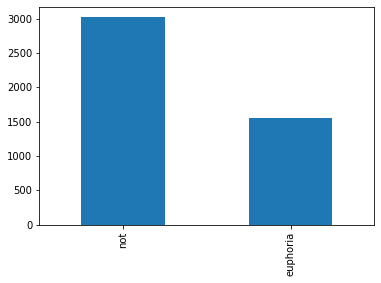

In [177]:
# # document 열과 label 열의 중복을 제외한 값의 개수

# def preprocess(train_data):
#   train_data['document'].nunique(),train_data['label'].nunique()
#   # document 열의 중복 제거
#   train_data.drop_duplicates(subset=['document'], inplace=True)
#   train_data['label'].value_counts().plot(kind = 'bar')
#   train_data.loc[train_data.document.isnull()]
#   train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
#   print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
#   # 한글과 공백을 제외하고 모두 제거
#   train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
#   train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
#   train_data['document'].replace('', np.nan, inplace=True)
#   train_data = train_data.dropna(how = 'any')
#   stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
#   okt = Okt()
#   okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)
#   X_train = []
#   for sentence in tqdm(train_data['document']):
#       tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
#       stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
#       X_train.append(stopwords_removed_sentence)
#   tokenizer = Tokenizer()
#   tokenizer.fit_on_texts(X_train)
#   threshold = 3
#   total_cnt = len(tokenizer.word_index) # 단어의 수
#   rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
#   total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
#   rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

#   # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
#   for key, value in tokenizer.word_counts.items():
#       total_freq = total_freq + value

#       # 단어의 등장 빈도수가 threshold보다 작으면
#       if(value < threshold):
#           rare_cnt = rare_cnt + 1
#           rare_freq = rare_freq + value

#   print('단어 집합(vocabulary)의 크기 :',total_cnt)
#   print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
#   print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
#   print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)
#   # 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
#   # 0번 패딩 토큰을 고려하여 + 1
#   vocab_size = total_cnt - rare_cnt + 1
#   print('단어 집합의 크기 :',vocab_size)
#   tokenizer = Tokenizer(vocab_size) 
#   tokenizer.fit_on_texts(X_train)
#   X_train = tokenizer.texts_to_sequences(X_train)
#   # X_test = tokenizer.texts_to_sequences(X_test)

#   return train_data, X_train

# train_data_dysphoria_processed, X_train_dysphoria =  preprocess(train_data_dysphoria)

# train_data_euphoria_processed, X_train_euphoria =  preprocess(train_data_euphoria)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
100%|██████████| 2770/2770 [00:03<00:00, 748.34it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


단어 집합(vocabulary)의 크기 : 3703
등장 빈도가 2번 이하인 희귀 단어의 수: 2306
단어 집합에서 희귀 단어의 비율: 62.27383202808534
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 11.596240359897173
단어 집합의 크기 : 1398


100%|██████████| 2770/2770 [00:03<00:00, 733.38it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


단어 집합(vocabulary)의 크기 : 3703
등장 빈도가 2번 이하인 희귀 단어의 수: 2306
단어 집합에서 희귀 단어의 비율: 62.27383202808534
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 11.596240359897173
단어 집합의 크기 : 1398


100%|██████████| 2770/2770 [00:04<00:00, 661.99it/s]


단어 집합(vocabulary)의 크기 : 3703
등장 빈도가 2번 이하인 희귀 단어의 수: 2306
단어 집합에서 희귀 단어의 비율: 62.27383202808534
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 11.596240359897173
단어 집합의 크기 : 1398


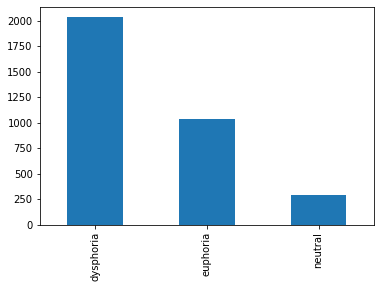

In [178]:
# # document 열과 label 열의 중복을 제외한 값의 개수

# def preprocess_test(train_data):
#   train_data['document'].nunique(),train_data['label'].nunique()
#   # document 열의 중복 제거
#   train_data.drop_duplicates(subset=['document'], inplace=True)
#   train_data['label'].value_counts().plot(kind = 'bar')
#   train_data.loc[train_data.document.isnull()]
#   train_data = train_data.fillna('빈 문장') # Null 값이 존재하는 행 제거
#   # print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
#   # 한글과 공백을 제외하고 모두 제거
#   train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
#   train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
#   train_data['document'].replace('', '빈 문장', inplace=True)
#   # train_data = train_data.dropna(how = 'any')
#   stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
#   okt = Okt()
#   okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)
#   X_train = []
#   for sentence in tqdm(train_data['document']):
#       tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
#       stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
#       X_train.append(stopwords_removed_sentence)
#   tokenizer = Tokenizer()
#   tokenizer.fit_on_texts(X_train)
#   threshold = 3
#   total_cnt = len(tokenizer.word_index) # 단어의 수
#   rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
#   total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
#   rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

#   # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
#   for key, value in tokenizer.word_counts.items():
#       total_freq = total_freq + value

#       # 단어의 등장 빈도수가 threshold보다 작으면
#       if(value < threshold):
#           rare_cnt = rare_cnt + 1
#           rare_freq = rare_freq + value

#   print('단어 집합(vocabulary)의 크기 :',total_cnt)
#   print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
#   print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
#   print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)
#   # 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
#   # 0번 패딩 토큰을 고려하여 + 1
#   vocab_size = total_cnt - rare_cnt + 1
#   print('단어 집합의 크기 :',vocab_size)
#   tokenizer = Tokenizer(vocab_size) 
#   tokenizer.fit_on_texts(X_train)
#   X_train = tokenizer.texts_to_sequences(X_train)
#   # X_test = tokenizer.texts_to_sequences(X_test)

#   return train_data, X_train



# test_data_dysphoria_processed, X_test_dysphoria =  preprocess_test(test_data_dysphoria)

# test_data_euphoria_processed, X_test_euphoria =  preprocess_test(test_data_euphoria)

# test_data_total_processed, X_test_total =  preprocess_test(test_data_total)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
100%|██████████| 4144/4144 [00:10<00:00, 407.85it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


단어 집합(vocabulary)의 크기 : 9020
등장 빈도가 2번 이하인 희귀 단어의 수: 6887
단어 집합에서 희귀 단어의 비율: 76.35254988913526
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 23.086863692549723
단어 집합의 크기 : 2134


 18%|█▊        | 739/4144 [00:01<00:08, 407.11it/s]


KeyboardInterrupt: ignored

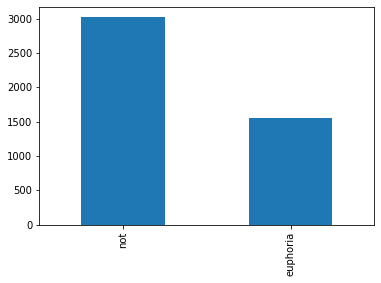

In [242]:
# # document 열과 label 열의 중복을 제외한 값의 개수

# def preprocess_pos(train_data):
  
#   train_data['document'].nunique(),train_data['label'].nunique()
#   # document 열의 중복 제거
#   train_data.drop_duplicates(subset=['document'], inplace=True)
#   train_data['label'].value_counts().plot(kind = 'bar')
#   train_data.loc[train_data.document.isnull()]
#   # train_data = train_data.fillna('빈 문장') # Null 값이 존재하는 행 제거
#   # print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
#   # 한글과 공백을 제외하고 모두 제거
#   # train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
#   train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
#   # train_data['document'].replace('', '빈 문장', inplace=True)
#   # train_data = train_data.dropna(how = 'any')
#   # stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
#   okt = Okt()
#   # okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)


#   X_train = []
#   for sentence in tqdm(train_data['document']):
#     pos = okt.pos(sentence)
#     main_words = [word_pos[0] for word_pos in pos if word_pos[1] not in ("Josa", "Suffix", "Number")] # 가져오고자 하는 품사에 해당하면 해당 형태소를 main_words 리스트에 추가합니다.
#     main_words_str = " ".join(main_words) # main_words 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
#     X_train.append(main_words_str) # 선택한 형태소들로 이루어진 문자열을 최종 리스트에 추가해줍니다
#     # print(X_train)
#     # tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
#     # stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
#     # X_train.append(stopwords_removed_sentence)
#   tokenizer = Tokenizer()
#   tokenizer.fit_on_texts(X_train)
#   threshold = 3
#   total_cnt = len(tokenizer.word_index) # 단어의 수
#   rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
#   total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
#   rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

#   # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
#   for key, value in tokenizer.word_counts.items():
#       total_freq = total_freq + value

#       # 단어의 등장 빈도수가 threshold보다 작으면
#       if(value < threshold):
#           rare_cnt = rare_cnt + 1
#           rare_freq = rare_freq + value

#   print('단어 집합(vocabulary)의 크기 :',total_cnt)
#   print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
#   print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
#   print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)
#   # 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
#   # 0번 패딩 토큰을 고려하여 + 1
#   vocab_size = total_cnt - rare_cnt + 1
#   print('단어 집합의 크기 :',vocab_size)
#   tokenizer = Tokenizer(vocab_size) 
#   tokenizer.fit_on_texts(X_train)
#   X_train = tokenizer.texts_to_sequences(X_train)
#   # X_test = tokenizer.texts_to_sequences(X_test)

#   return train_data, X_train


# train_data_dysphoria_processed, X_train_dysphoria =  preprocess_pos(train_data_dysphoria)

# train_data_euphoria_processed, X_train_euphoria =  preprocess_pos(train_data_euphoria)

# test_data_dysphoria_processed, X_test_dysphoria =  preprocess_pos(test_data_dysphoria)

# test_data_euphoria_processed, X_test_euphoria =  preprocess_pos(test_data_euphoria)

# test_data_total_processed, X_test_total =  preprocess_pos(test_data_total)



In [253]:
# train_data_dysphoria_processed, X_train_dysphoria =  preprocess_pos_d(train_data_dysphoria)

# train_data_euphoria_processed, X_train_euphoria =  preprocess_pos_d(train_data_euphoria)

# test_data_dysphoria_processed, X_test_dysphoria =  preprocess_pos_d(test_data_dysphoria)

# test_data_euphoria_processed, X_test_euphoria =  preprocess_pos_d(test_data_euphoria)

# test_data_total_processed, X_test_total =  preprocess_pos_d(test_data_total)

0

In [39]:
train_data_dysphoria.isnull().sum()

document                 0
context               1209
target_speaker_ctx       0
other_speaker_ctx        0
label                    0
dtype: int64

In [51]:
# document 열과 label 열의 중복을 제외한 값의 개수

def preprocess_pos_d(train_data):

  X_train_d = []
  for col in ['document','context', 'target_speaker_ctx','other_speaker_ctx']:

    # document 열의 중복 제거
    # train_data.drop_duplicates(subset=[col], inplace=True)
    # train_data['label'].value_counts().plot(kind = 'bar')
    # train_data.loc[train_data.document.isnull()]
    # train_data = train_data.fillna('빈 문장') # Null 값이 존재하는 행 제거
    # print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
    # 한글과 공백을 제외하고 모두 제거
    # train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
    train_data[col] = train_data[col].str.replace('^ +', "") # white space 데이터를 empty value로 변경
    # train_data['document'].replace('', '빈 문장', inplace=True)
    # train_data = train_data.dropna(how = 'any')
    # stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
    okt = Okt()
    # okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)


    X_train = []
    for sentence in tqdm(train_data[col]):
      # print(sentence)
      pos = okt.pos(sentence)
      main_words = [word_pos[0] for word_pos in pos if word_pos[1] not in ("Josa", "Suffix", "Number")] # 가져오고자 하는 품사에 해당하면 해당 형태소를 main_words 리스트에 추가합니다.
      if len(main_words)==0:
          main_words.append('.')
      main_words_str = " ".join(main_words) # main_words 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.

      X_train.append(main_words_str) # 선택한 형태소들로 이루어진 문자열을 최종 리스트에 추가해줍니다
      # print(X_train)
      # tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
      # stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
      # X_train.append(stopwords_removed_sentence)
    
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    threshold = 3
    total_cnt = len(tokenizer.word_index) # 단어의 수
    rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
    total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
    rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

    # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
    for key, value in tokenizer.word_counts.items():
        total_freq = total_freq + value

        # 단어의 등장 빈도수가 threshold보다 작으면
        if(value < threshold):
            rare_cnt = rare_cnt + 1
            rare_freq = rare_freq + value

    print('단어 집합(vocabulary)의 크기 :',total_cnt)
    print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
    print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
    print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)
    # 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
    # 0번 패딩 토큰을 고려하여 + 1
    vocab_size = total_cnt - rare_cnt + 1
    print('단어 집합의 크기 :',vocab_size)
    tokenizer = Tokenizer(vocab_size) 
    tokenizer.fit_on_texts(X_train)
    X_train = tokenizer.texts_to_sequences(X_train)
    # X_test = tokenizer.texts_to_sequences(X_test)

    X_train_d.append(X_train)


  return train_data, X_train_d


train_data_dysphoria_processed, X_train_dysphoria =  preprocess_pos_d(train_data_dysphoria)

train_data_euphoria_processed, X_train_euphoria =  preprocess_pos_d(train_data_euphoria)

test_data_dysphoria_processed, X_test_dysphoria =  preprocess_pos_d(test_data_dysphoria)

test_data_euphoria_processed, X_test_euphoria =  preprocess_pos_d(test_data_euphoria)

test_data_total_processed, X_test_total =  preprocess_pos_d(test_data_total)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
100%|██████████| 4403/4403 [00:07<00:00, 577.11it/s]


단어 집합(vocabulary)의 크기 : 9020
등장 빈도가 2번 이하인 희귀 단어의 수: 6883
단어 집합에서 희귀 단어의 비율: 76.30820399113082
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 22.881898977516506
단어 집합의 크기 : 2138


100%|██████████| 4403/4403 [00:06<00:00, 683.70it/s]


단어 집합(vocabulary)의 크기 : 2175
등장 빈도가 2번 이하인 희귀 단어의 수: 602
단어 집합에서 희귀 단어의 비율: 27.67816091954023
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.5673745936256194
단어 집합의 크기 : 1574


100%|██████████| 4403/4403 [00:18<00:00, 234.15it/s]


단어 집합(vocabulary)의 크기 : 9331
등장 빈도가 2번 이하인 희귀 단어의 수: 3897
단어 집합에서 희귀 단어의 비율: 41.76401243167935
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.99469666877798
단어 집합의 크기 : 5435


100%|██████████| 4403/4403 [00:29<00:00, 151.07it/s]


단어 집합(vocabulary)의 크기 : 10464
등장 빈도가 2번 이하인 희귀 단어의 수: 3630
단어 집합에서 희귀 단어의 비율: 34.690366972477065
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.520827624006577
단어 집합의 크기 : 6835


100%|██████████| 4403/4403 [00:07<00:00, 576.83it/s]


단어 집합(vocabulary)의 크기 : 9020
등장 빈도가 2번 이하인 희귀 단어의 수: 6883
단어 집합에서 희귀 단어의 비율: 76.30820399113082
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 22.881898977516506
단어 집합의 크기 : 2138


100%|██████████| 4403/4403 [00:06<00:00, 692.72it/s]


단어 집합(vocabulary)의 크기 : 2175
등장 빈도가 2번 이하인 희귀 단어의 수: 602
단어 집합에서 희귀 단어의 비율: 27.67816091954023
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.5673745936256194
단어 집합의 크기 : 1574


100%|██████████| 4403/4403 [00:19<00:00, 229.89it/s]


단어 집합(vocabulary)의 크기 : 9331
등장 빈도가 2번 이하인 희귀 단어의 수: 3897
단어 집합에서 희귀 단어의 비율: 41.76401243167935
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.99469666877798
단어 집합의 크기 : 5435


100%|██████████| 4403/4403 [00:29<00:00, 150.01it/s]


단어 집합(vocabulary)의 크기 : 10464
등장 빈도가 2번 이하인 희귀 단어의 수: 3630
단어 집합에서 희귀 단어의 비율: 34.690366972477065
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.520827624006577
단어 집합의 크기 : 6835


100%|██████████| 2936/2936 [00:05<00:00, 571.51it/s]


단어 집합(vocabulary)의 크기 : 7091
등장 빈도가 2번 이하인 희귀 단어의 수: 5557
단어 집합에서 희귀 단어의 비율: 78.36694401353829
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 27.32548430193721
단어 집합의 크기 : 1535


100%|██████████| 2936/2936 [00:04<00:00, 659.14it/s]


단어 집합(vocabulary)의 크기 : 2031
등장 빈도가 2번 이하인 희귀 단어의 수: 645
단어 집합에서 희귀 단어의 비율: 31.757754800590842
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.905760100331452
단어 집합의 크기 : 1387


100%|██████████| 2936/2936 [00:13<00:00, 222.54it/s]


단어 집합(vocabulary)의 크기 : 8273
등장 빈도가 2번 이하인 희귀 단어의 수: 4087
단어 집합에서 희귀 단어의 비율: 49.40166807687659
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.779446543198501
단어 집합의 크기 : 4187


100%|██████████| 2936/2936 [00:23<00:00, 126.43it/s]


단어 집합(vocabulary)의 크기 : 9667
등장 빈도가 2번 이하인 희귀 단어의 수: 4108
단어 집합에서 희귀 단어의 비율: 42.495086376331855
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.501181558125963
단어 집합의 크기 : 5560


100%|██████████| 2936/2936 [00:05<00:00, 571.31it/s]


단어 집합(vocabulary)의 크기 : 7091
등장 빈도가 2번 이하인 희귀 단어의 수: 5557
단어 집합에서 희귀 단어의 비율: 78.36694401353829
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 27.32548430193721
단어 집합의 크기 : 1535


100%|██████████| 2936/2936 [00:04<00:00, 685.26it/s]


단어 집합(vocabulary)의 크기 : 2031
등장 빈도가 2번 이하인 희귀 단어의 수: 645
단어 집합에서 희귀 단어의 비율: 31.757754800590842
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.905760100331452
단어 집합의 크기 : 1387


100%|██████████| 2936/2936 [00:13<00:00, 218.16it/s]


단어 집합(vocabulary)의 크기 : 8273
등장 빈도가 2번 이하인 희귀 단어의 수: 4087
단어 집합에서 희귀 단어의 비율: 49.40166807687659
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.779446543198501
단어 집합의 크기 : 4187


100%|██████████| 2936/2936 [00:24<00:00, 121.96it/s]


단어 집합(vocabulary)의 크기 : 9667
등장 빈도가 2번 이하인 희귀 단어의 수: 4108
단어 집합에서 희귀 단어의 비율: 42.495086376331855
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.501181558125963
단어 집합의 크기 : 5560


100%|██████████| 2936/2936 [00:05<00:00, 557.61it/s]


단어 집합(vocabulary)의 크기 : 7091
등장 빈도가 2번 이하인 희귀 단어의 수: 5557
단어 집합에서 희귀 단어의 비율: 78.36694401353829
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 27.32548430193721
단어 집합의 크기 : 1535


100%|██████████| 2936/2936 [00:04<00:00, 692.82it/s]


단어 집합(vocabulary)의 크기 : 2031
등장 빈도가 2번 이하인 희귀 단어의 수: 645
단어 집합에서 희귀 단어의 비율: 31.757754800590842
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.905760100331452
단어 집합의 크기 : 1387


100%|██████████| 2936/2936 [00:14<00:00, 205.62it/s]


단어 집합(vocabulary)의 크기 : 8273
등장 빈도가 2번 이하인 희귀 단어의 수: 4087
단어 집합에서 희귀 단어의 비율: 49.40166807687659
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.779446543198501
단어 집합의 크기 : 4187


100%|██████████| 2936/2936 [00:21<00:00, 135.48it/s]


단어 집합(vocabulary)의 크기 : 9667
등장 빈도가 2번 이하인 희귀 단어의 수: 4108
단어 집합에서 희귀 단어의 비율: 42.495086376331855
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.501181558125963
단어 집합의 크기 : 5560


In [52]:
test_data_dysphoria_processed.shape, len(X_test_dysphoria), test_data_euphoria_processed.shape, len(X_test_euphoria)


((2936, 5), 4, (2936, 5), 4)

In [59]:
len(X_test_dysphoria[1])

2936

In [ ]:
# # test_data_dysphoria_processed.fillna('.')
# for aaa in range(len(X_train_dysphoria)):
#   if len(X_train_dysphoria[aaa])==0:
#     print('ok')

In [ ]:
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
# okt = Okt()
# okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)
# X_train = []
# for sentence in tqdm(train_data['document']):
#     tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
#     stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
#     X_train.append(stopwords_removed_sentence)
# print(X_train[:3])

In [ ]:
# X_test = []
# for sentence in tqdm(test_data['document']):
#     tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
#     stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
#     X_test.append(stopwords_removed_sentence)

In [ ]:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_train)

In [ ]:
# print(tokenizer.word_index)

In [ ]:
# threshold = 3
# total_cnt = len(tokenizer.word_index) # 단어의 수
# rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
# total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
# rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
# for key, value in tokenizer.word_counts.items():
#     total_freq = total_freq + value

#     # 단어의 등장 빈도수가 threshold보다 작으면
#     if(value < threshold):
#         rare_cnt = rare_cnt + 1
#         rare_freq = rare_freq + value

# print('단어 집합(vocabulary)의 크기 :',total_cnt)
# print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
# print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
# print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [ ]:
# # 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# # 0번 패딩 토큰을 고려하여 + 1
# vocab_size = total_cnt - rare_cnt + 1
# print('단어 집합의 크기 :',vocab_size)

In [ ]:
# tokenizer = Tokenizer(vocab_size) 
# tokenizer.fit_on_texts(X_train)
# X_train = tokenizer.texts_to_sequences(X_train)
# # X_test = tokenizer.texts_to_sequences(X_test)

In [56]:
def to_num(label):
  if label == 'not':
    label = 1
    return label
  else:
    label = 0
    return label


Y_train_tonum_euphoria = train_data_euphoria_processed['label'].apply(to_num)  
Y_train_tonum_dysphoria = train_data_dysphoria_processed['label'].apply(to_num) 

Y_test_tonum_euphoria = test_data_euphoria_processed['label'].apply(to_num)  
Y_test_tonum_dysphoria = test_data_dysphoria_processed['label'].apply(to_num) 


Y_test_tonum_total = np.array(test_data_total_processed['label'])

In [57]:
Y_train_euphoria = np.array(Y_train_tonum_euphoria)
Y_train_dysphoria = np.array(Y_train_tonum_dysphoria)

Y_test_euphoria = np.array(Y_test_tonum_euphoria)
Y_test_dysphoria = np.array(Y_test_tonum_dysphoria)

Y_test_total = np.array(Y_test_tonum_total)
# y_test = np.array(test_data['label'])



Y_train_dysphoria.shape

(4403,)

# 5) 빈 샘플 제거

전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 빈도수가 낮은 단어만으로 구성되었던 샘플들은 빈(empty) 샘플이 되었다는 것을 의미합니다. 빈 샘플들은 어떤 레이블이 붙어있던 의미가 없으므로 빈 샘플들을 제거해주는 작업을 하겠습니다. 각 샘플들의 길이를 확인해서 길이가 0인 샘플들의 인덱스를 받아오겠습니다.

In [27]:
drop_train = [index for index, sentence in enumerate(X_train_euphoria) if len(sentence) < 1]
drop_train

[]

In [60]:
# 빈 샘플들을 제거
train_x_euphoria = np.delete(X_train_euphoria, drop_train, axis=0)
train_x_dysphoria = np.delete(X_train_dysphoria, drop_train, axis=0)

train_y_euphoria = np.delete(Y_train_euphoria, drop_train, axis=0)
train_y_dysphoria = np.delete(Y_train_dysphoria, drop_train, axis=0)

# len(np.delete(Y_train, drop_train, axis=0))

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [61]:
# test_x_euphoria = np.delete(X_test_euphoria, drop_train, axis=0)
# test_x_dysphoria = np.delete(X_test_dysphoria, drop_train, axis=0)

# test_y_euphoria = np.delete(Y_test_euphoria, drop_train, axis=0)
# test_y_dysphoria = np.delete(Y_test_dysphoria, drop_train, axis=0)

test_x_euphoria = X_test_euphoria.copy()
test_x_dysphoria = X_test_dysphoria.copy()
test_x_total= X_test_total.copy()

test_y_euphoria = Y_test_euphoria.copy()
test_y_dysphoria = Y_test_dysphoria.copy()
test_y_total= Y_test_total.copy()



In [62]:
len(test_x_euphoria) , len(test_x_dysphoria), len(test_x_total)

(4, 4, 4)

# 6) 패딩

서로 다른 길이의 샘플들의 길이를 동일하게 맞춰주는 패딩 작업을 진행해보겠습니다. 전체 데이터에서 가장 길이가 긴 리뷰와 전체 데이터의 길이 분포를 알아보겠습니다.

In [74]:
train_x_euphoria.shape

(4, 4403)

리뷰의 최대 길이 : 38
리뷰의 평균 길이 : 6.286622757210992


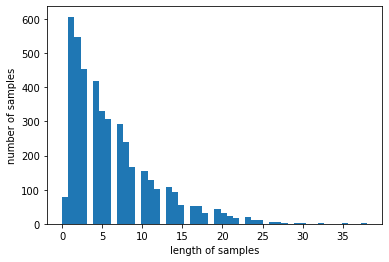

전체 샘플 중 길이가 25 이하인 샘플의 비율: 99.50034067681126
리뷰의 최대 길이 : 46
리뷰의 평균 길이 : 7.283215989098342


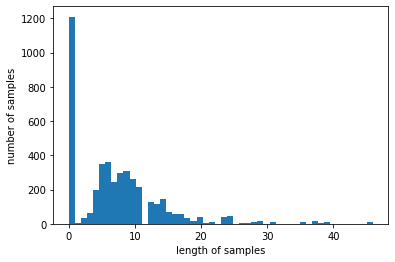

전체 샘플 중 길이가 25 이하인 샘플의 비율: 97.79695662048603
리뷰의 최대 길이 : 259
리뷰의 평균 길이 : 19.887576652282533


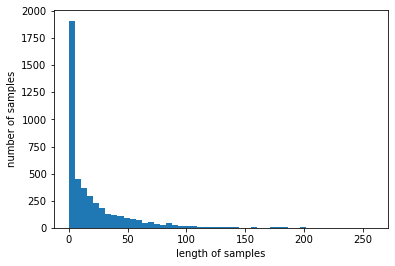

전체 샘플 중 길이가 25 이하인 샘플의 비율: 73.94957983193278
리뷰의 최대 길이 : 492
리뷰의 평균 길이 : 31.98296615943675


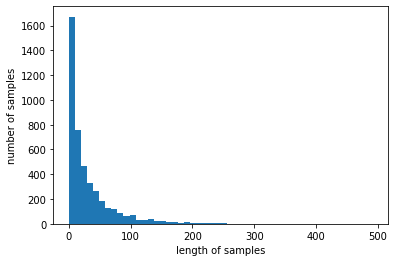

전체 샘플 중 길이가 25 이하인 샘플의 비율: 62.41199182375653
리뷰의 최대 길이 : 38
리뷰의 평균 길이 : 6.286622757210992


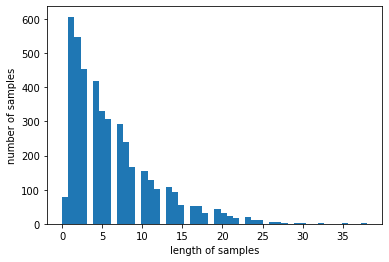

전체 샘플 중 길이가 25 이하인 샘플의 비율: 99.50034067681126
리뷰의 최대 길이 : 46
리뷰의 평균 길이 : 7.283215989098342


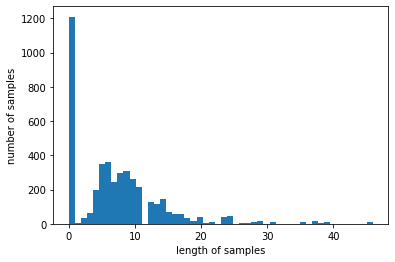

전체 샘플 중 길이가 25 이하인 샘플의 비율: 97.79695662048603
리뷰의 최대 길이 : 259
리뷰의 평균 길이 : 19.887576652282533


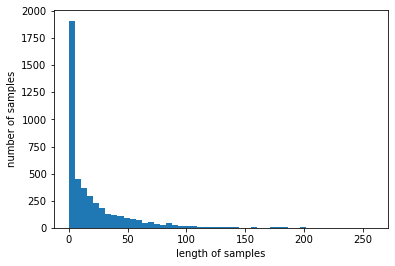

전체 샘플 중 길이가 25 이하인 샘플의 비율: 73.94957983193278
리뷰의 최대 길이 : 492
리뷰의 평균 길이 : 31.98296615943675


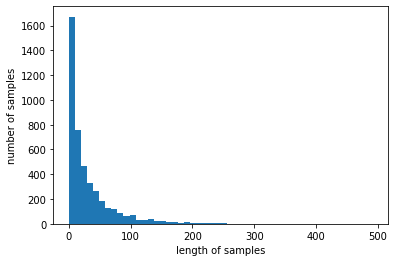

전체 샘플 중 길이가 25 이하인 샘플의 비율: 62.41199182375653
리뷰의 최대 길이 : 34
리뷰의 평균 길이 : 5.9288147138964575


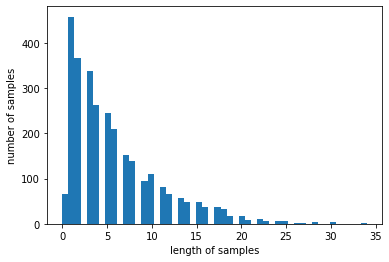

전체 샘플 중 길이가 25 이하인 샘플의 비율: 99.62534059945504
리뷰의 최대 길이 : 48
리뷰의 평균 길이 : 7.3072207084468666


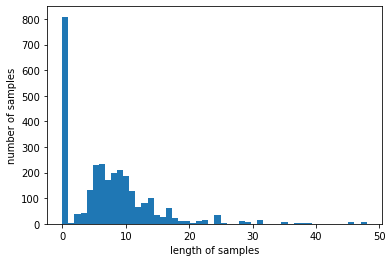

전체 샘플 중 길이가 25 이하인 샘플의 비율: 97.58174386920982
리뷰의 최대 길이 : 270
리뷰의 평균 길이 : 20.231948228882835


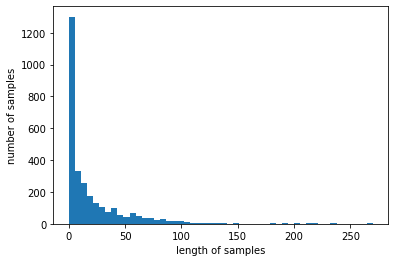

전체 샘플 중 길이가 25 이하인 샘플의 비율: 73.87602179836512
리뷰의 최대 길이 : 409
리뷰의 평균 길이 : 33.64202997275204


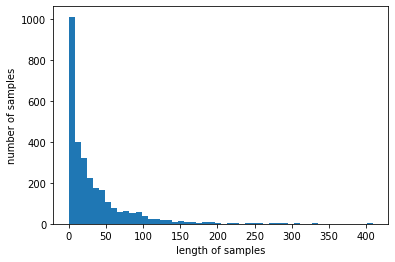

전체 샘플 중 길이가 25 이하인 샘플의 비율: 60.252043596730246
리뷰의 최대 길이 : 34
리뷰의 평균 길이 : 5.9288147138964575


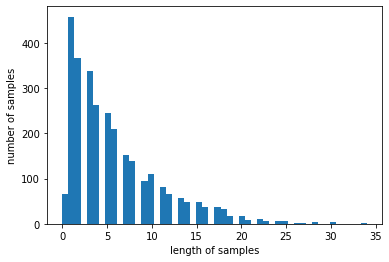

전체 샘플 중 길이가 25 이하인 샘플의 비율: 99.62534059945504
리뷰의 최대 길이 : 48
리뷰의 평균 길이 : 7.3072207084468666


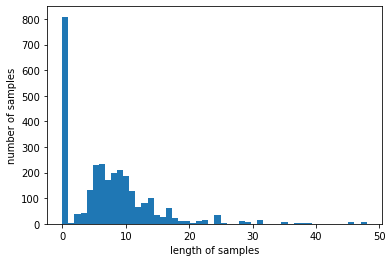

전체 샘플 중 길이가 25 이하인 샘플의 비율: 97.58174386920982
리뷰의 최대 길이 : 270
리뷰의 평균 길이 : 20.231948228882835


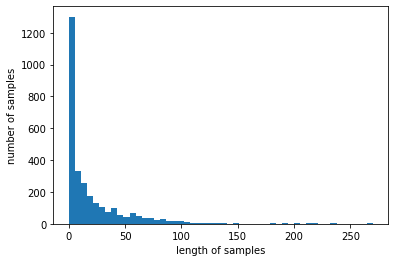

전체 샘플 중 길이가 25 이하인 샘플의 비율: 73.87602179836512
리뷰의 최대 길이 : 409
리뷰의 평균 길이 : 33.64202997275204


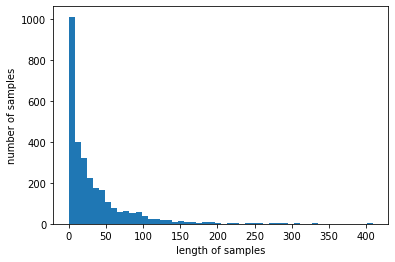

전체 샘플 중 길이가 25 이하인 샘플의 비율: 60.252043596730246
리뷰의 최대 길이 : 34
리뷰의 평균 길이 : 5.9288147138964575


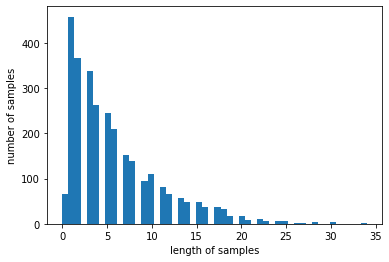

전체 샘플 중 길이가 25 이하인 샘플의 비율: 99.62534059945504
리뷰의 최대 길이 : 48
리뷰의 평균 길이 : 7.3072207084468666


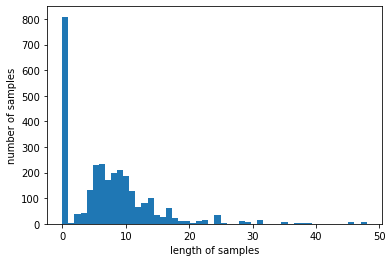

전체 샘플 중 길이가 25 이하인 샘플의 비율: 97.58174386920982
리뷰의 최대 길이 : 270
리뷰의 평균 길이 : 20.231948228882835


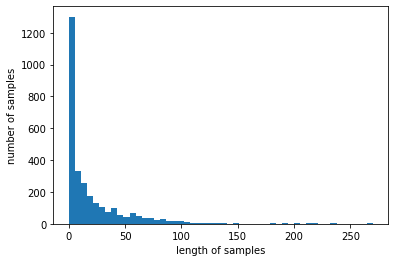

전체 샘플 중 길이가 25 이하인 샘플의 비율: 73.87602179836512
리뷰의 최대 길이 : 409
리뷰의 평균 길이 : 33.64202997275204


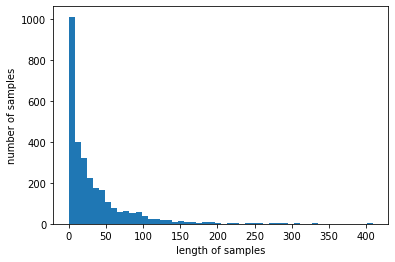

전체 샘플 중 길이가 25 이하인 샘플의 비율: 60.252043596730246


((4, 2936, 25), (4, 2936, 25))

In [65]:
def preprocess2(train_x):  

  train_x_pad_d = []

  for index in range(len(train_x)):

    print('리뷰의 최대 길이 :',max(len(review) for review in train_x[index]))
    print('리뷰의 평균 길이 :',sum(map(len, train_x[index]))/len(train_x[index]))
    plt.hist([len(review) for review in train_x[index]], bins=50)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.show()

    def below_threshold_len(max_len, nested_list):
      count = 0
      for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
      print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

    max_len = 25
    below_threshold_len(max_len, train_x[index])
    train_x_pad = pad_sequences(train_x[index], maxlen=max_len)
    # X_test = pad_sequences(X_test, maxlen=max_len)

    train_x_pad_d.append(train_x_pad)

  return np.array(train_x_pad_d)

train_x_pad_euphoria = preprocess2(train_x_euphoria)
train_x_pad_dysphoria = preprocess2(train_x_dysphoria)

test_x_pad_euphoria = preprocess2(test_x_euphoria)
test_x_pad_dysphoria = preprocess2(test_x_dysphoria)

test_x_pad_total = preprocess2(test_x_total)


test_x_pad_euphoria.shape, test_x_pad_dysphoria.shape


## 2. CNN-LSTM 네이버 영화 리뷰 감성 분석하기

하이퍼파라미터인 임베딩 벡터의 차원은 100, 은닉 상태의 크기는 128입니다. 모델은 다 대 일 구조의 LSTM을 사용합니다. 해당 모델은 마지막 시점에서 두 개의 선택지 중 하나를 예측하는 이진 분류 문제를 수행하는 모델입니다. 이진 분류 문제의 경우, 출력층에 로지스틱 회귀를 사용해야 하므로 활성화 함수로는 시그모이드 함수를 사용하고, 손실 함수로 크로스 엔트로피 함수를 사용합니다. 하이퍼파라미터인 배치 크기는 64이며, 15 에포크를 수행합니다.

EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)는 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 4회 증가하면 정해진 에포크가 도달하지 못하였더라도 학습을 조기 종료(Early Stopping)한다는 의미입니다. ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다. validation_split=0.2을 사용하여 훈련 데이터의 20%를 검증 데이터로 분리해서 사용하고, 검증 데이터를 통해서 훈련이 적절히 되고 있는지 확인합니다. 검증 데이터는 기계가 훈련 데이터에 과적합되고 있지는 않은지 확인하기 위한 용도로 사용됩니다.

In [77]:
train_x_pad_euphoria.shape

(4, 4403, 25)

In [222]:
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Embedding, Dense, LSTM, InputLayer, Dropout, Activation, TimeDistributed, Bidirectional
# from tensorflow.keras.layers import Conv1D, MaxPooling1D
# from keras.datasets import imdb
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.models import load_model
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# import numpy
# import tensorflow as tf
# import matplotlib.pyplot as plt

# x_train_a, x_test_a, y_train_a,  y_test_a = train_test_split(train_x_pad_euphoria, train_y_euphoria, test_size = 0.3, random_state= 7777777, stratify= train_y_euphoria)
# # x_train.shape, y_train.shape

# model_lstm_a = Sequential()
# model_lstm_a.add(Embedding(10000,100,input_length=None))
# model_lstm_a.add(LSTM(128))
# model_lstm_a.add(Dense(1,activation='sigmoid'))
# model_lstm_a.summary()

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('best_model_a.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# model_lstm_a.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
# history = model_lstm_a.fit(x_train_a, y_train_a, epochs=30, callbacks=[es, mc], batch_size=32, validation_data=(x_test_a, y_test_a))

In [223]:
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Embedding, Dense, LSTM, InputLayer, Dropout, Activation, TimeDistributed, Bidirectional
# from tensorflow.keras.layers import Conv1D, MaxPooling1D
# from keras.datasets import imdb
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.models import load_model
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# import numpy
# import tensorflow as tf
# import matplotlib.pyplot as plt

# x_train_d, x_test_d, y_train_d,  y_test_d = train_test_split(train_x_pad_dysphoria, train_y_dysphoria, test_size = 0.3, random_state= 7777777, stratify= train_y_dysphoria)
# # x_train.shape, y_train.shape

# model_lstm_d = Sequential()
# model_lstm_d.add(Embedding(10000,100,input_length=None))
# model_lstm_d.add(LSTM(128))
# model_lstm_d.add(Dense(1,activation='sigmoid'))
# model_lstm_d.summary()

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('best_model_d.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# model_lstm_d.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
# history = model_lstm_d.fit(x_train_d, y_train_d, epochs=30, callbacks=[es, mc], batch_size=32, validation_data=(x_test_d, y_test_d))

In [66]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

import os # GPU 설정
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 


Found GPU at: /device:GPU:0


In [84]:
train_x_pad_dysphoria.shape

(4, 4403, 25)

In [112]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Dense, LSTM, InputLayer, Dropout, Activation, TimeDistributed, Bidirectional, Input, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.models import Model 
from keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

x_train_d, x_test_d, y_train_d,  y_test_d = train_test_split(train_x_pad_dysphoria.reshape(4403, 4*25), train_y_dysphoria, test_size = 0.3, random_state= 7777777, stratify= train_y_dysphoria)
# x_train.shape, y_train.shape


# input = Input(shape = (100))
# # output = TimeDistributed(Flatten(input_shape=(4,25)))(input)
# output = Embedding(10000,100,input_length=None)(input)
# # output = Bidirectional(LSTM(128, dropout=0.25, return_sequences =True))(output)
# output = Bidirectional(LSTM(128, dropout=0.25))(output)
# output = Dense(1,activation='sigmoid')(output)

# model_lstm_d = Model(input, output)

# model_lstm_d.summary()


model_lstm_d = Sequential()
model_lstm_d.add(Embedding(10000, 100))
model_lstm_d.add(Conv1D(128, 5, padding='valid', activation='relu', strides=1))
model_lstm_d.add(MaxPooling1D(pool_size=4))
model_lstm_d.add(layers.Bidirectional(layers.LSTM(128)))
model_lstm_d.add(Dropout(0.25))
model_lstm_d.add(layers.Dense(10))
model_lstm_d.add(layers.Dense(1))
model_lstm_d.add(Activation('sigmoid'))
model_lstm_d.summary()

# model_lstm_d = Sequential()
# model_lstm_d.add(Embedding(10000,100,input_length=None))
# # model_lstm_d.add(layers.Bidirectional(LSTM(64, dropout=0.25, recurrent_dropout=0.25)))
# model_lstm_d.add(layers.Bidirectional(LSTM(128, dropout=0.25, recurrent_dropout=0.25, inputs)))
# # model_lstm_d.add(Dense(20,activation='sigmoid'))
# model_lstm_d.add(Dense(1,activation='sigmoid'))
# model_lstm_d.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_d.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model_lstm_d.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history = model_lstm_d.fit(x_train_d, y_train_d, epochs=30, callbacks=[es, mc], batch_size=32, validation_data=(x_test_d, y_test_d))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, None, 100)         1000000   
                                                                 
 conv1d (Conv1D)             (None, None, 128)         64128     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 128)        0         
 )                                                               
                                                                 
 bidirectional_27 (Bidirecti  (None, 256)              263168    
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 10)               

In [225]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Dense, LSTM, InputLayer, Dropout, Activation, TimeDistributed, Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import numpy
import tensorflow as tf
import matplotlib.pyplot as plt


# with tf.device('/device:GPU:0'):
#   random_image_gpu = tf.random.normal((100, 100, 100, 3))
#   net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)



with tf.device('/device:GPU:0'):

  x_train_a, x_test_a, y_train_a,  y_test_a = train_test_split(train_x_pad_euphoria, train_y_euphoria, test_size = 0.3, random_state= 7777777, stratify= train_y_euphoria)
  # x_train.shape, y_train.shape

  model_lstm_a = Sequential()
  model_lstm_a.add(Embedding(10000,100,input_length=None))
  # model_lstm_a.add(LSTM(128))
  model_lstm_a.add(layers.Bidirectional(LSTM(256, dropout=0.25, recurrent_dropout=0.25)))
  model_lstm_a.add(Dense(1,activation='sigmoid'))
  model_lstm_a.summary()
  

  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
  mc = ModelCheckpoint('best_model_a.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

  model_lstm_a.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
  history = model_lstm_a.fit(x_train_a, y_train_a, epochs=30, callbacks=[es, mc], batch_size=32, validation_data=(x_test_a, y_test_a))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 100)         1000000   
                                                                 
 bidirectional_10 (Bidirecti  (None, 512)              731136    
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 1)                 513       
                                                                 
Total params: 1,731,649
Trainable params: 1,731,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
89/89 [==============================] - ETA: 0s - loss: 0.5977 - acc: 0.7207
Epoch 1: val_acc improved from -inf to 0.72929, saving model to best_model_a.h5
89/89 [==============================] - 23s 210ms/step - loss: 0.5977 -

In [226]:
# loaded_model = load_model('best_model.h5')
a = model_lstm_a.evaluate(test_x_pad_euphoria , test_y_euphoria)
d = model_lstm_d.evaluate(test_x_pad_dysphoria , test_y_dysphoria)

print(a, d)

prediction_euphoria = model_lstm_a.predict(test_x_pad_euphoria)
prediction_dysphoria = model_lstm_d.predict(test_x_pad_dysphoria)



87/87 [==============================] - 1s 14ms/step - loss: 1.3736 - acc: 0.5466
[1.3019987344741821, 0.6469314098358154] [1.3736066818237305, 0.5465704202651978]
87/87 [==============================] - 2s 13ms/step


In [203]:
test_y_euphoria

array([0, 1, 0, ..., 1, 1, 1])

In [150]:
prediction =[]

for i in range(len(prediction_euphoria)):
  if prediction_euphoria[i] < 0.5:
    prediction.append(0)
  else:
    prediction.append(1)

  
score = (prediction == test_y_euphoria).sum()
score/2770

0.6725631768953069

In [149]:
prediction =[]

for i in range(len(prediction_dysphoria)):
  if prediction_dysphoria[i] < 0.5:
    prediction.append(0)
  else:
    prediction.append(1)

  
score = (prediction == test_y_dysphoria).sum()
score/2770

0.5855595667870036

In [159]:
print(len(prediction_euphoria))
print(len(prediction_dysphoria))

print(prediction_euphoria)
print(prediction_dysphoria)

prediction = []

th = 0.5

for i in range(len(prediction_euphoria)):


  # if abs(prediction_euphoria[i] - prediction_dysphoria[i]) < 0.3 :
  #   if (prediction_euphoria[i] < th) & (prediction_dysphoria[i] > th):

  #   prediction.append('neutral')

  # else:
  if (prediction_euphoria[i] <= th) & (prediction_dysphoria[i] >= th):
    prediction.append('euphoria')

  elif (prediction_euphoria[i] >= th) & (prediction_dysphoria[i] <= th):
    prediction.append('dysphoria')

  elif (prediction_euphoria[i] <= th) & (prediction_dysphoria[i] <= th):

    # if abs(prediction_euphoria[i] - prediction_dysphoria[i]) < 0.1:
    #    prediction.append('neutral')

    if prediction_euphoria[i] > prediction_dysphoria[i]:
      prediction.append('dysphoria')

    elif prediction_euphoria[i] < prediction_dysphoria[i]:
      prediction.append('euphoria')
    
  else:
    prediction.append('neutral')


print(len(prediction))


2770
2770
[[0.80196387]
 [0.97763205]
 [0.7665231 ]
 ...
 [0.65257305]
 [0.9950564 ]
 [0.9803109 ]]
[[0.355147  ]
 [0.01041934]
 [0.1876609 ]
 ...
 [0.92724043]
 [0.00490221]
 [0.02267619]]
2770


In [160]:
test_y_total

array(['euphoria', 'dysphoria', 'euphoria', ..., 'neutral', 'dysphoria',
       'dysphoria'], dtype=object)

In [161]:
score = (prediction ==test_y_total).sum()

In [162]:
score/2770

0.527797833935018

In [108]:
# kerc_x = raw_data[:7339]
# kerc_y = raw_data[:7339]

# kerc_x = kerc_x['sentence']
# kerc_y = kerc_y['label']

In [ ]:
# def change_class_dysphoria(label):
#   if label in ['dysphoria']:
#     label= 0
#     return label
#   else:
#     label = 1
#     return label

# def change_class_euphoria(label):
#   if label in ['euphoria']:
#     label= 0
#     return label
#   else:
#     label = 1
#     return label

In [ ]:
kerc_x = train_x_pad[:7339]
kerc_y = train_y[:7339]

# kerc_y_rev = kerc_y.copy()
# kerc_y_rev = kerc_y_rev.apply(change_class_euphoria)
# kerc_y_rev 

In [ ]:
kerc_x

array([[   0,    0,   60, ..., 1649,    1,  715],
       [   0,    0,    0, ...,   12,  324,  954],
       [   0,    0,    0, ...,  122,   37,   26],
       ...,
       [   0,    0,    0, ...,    5,  108,   62],
       [   0,    0,    0, ...,   36,    6,    7],
       [   0,    0,    0, ...,   17,    1,  680]], dtype=int32)

In [ ]:
pd.Series(kerc_y).value_counts()

0    4724
1    2615
dtype: int64

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도(loss, acc): " , model_lstm.evaluate(kerc_x , kerc_y))

230/230 [==============================] - 3s 14ms/step - loss: 0.4018 - acc: 0.8537

 테스트 정확도(loss, acc):  [0.4017942547798157, 0.8536585569381714]


In [ ]:
prediction_dysphoria =  model_lstm.predict(kerc_x)
prediction_dysphoria 




230/230 [==============================] - 3s 14ms/step


array([[4.6360773e-01],
       [1.8952533e-03],
       [9.1178828e-01],
       ...,
       [1.9353182e-03],
       [2.0992234e-03],
       [1.1071332e-04]], dtype=float32)

In [ ]:
# prediction_euphoria =  model_lstm.predict(kerc_x)
# prediction_euphoria 

161/230 [====================>.........] - ETA: 0s

KeyboardInterrupt: ignored

In [ ]:
prediction_dysphoria 

array([[4.6360773e-01],
       [1.8952533e-03],
       [9.1178828e-01],
       ...,
       [1.9353182e-03],
       [2.0992234e-03],
       [1.1071332e-04]], dtype=float32)

In [ ]:
prediction_euphoria 

array([[0.93047106],
       [0.9849134 ],
       [0.88269943],
       ...,
       [0.9988724 ],
       [0.9884098 ],
       [0.999921  ]], dtype=float32)

In [ ]:
v_test = []
for sentence in tqdm(train_data['document'][:7339]):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

[247,
 271,
 1146,
 1872,
 2489,
 2638,
 3132,
 3177,
 3219,
 3304,
 3325,
 3805,
 4162,
 4200,
 4908,
 5713,
 5894,
 6145,
 6319,
 9795,
 71376]

In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
# X_test = tokenizer.texts_to_sequences(X_test)

7339


In [ ]:
# 빈 샘플들을 제거
train_x = np.delete(X_train, drop_train, axis=0)
train_y = np.delete(Y_train, drop_train, axis=0)
print(len(train_x))
print(len(train_y))
# len(np.delete(Y_train, drop_train, axis=0))

In [ ]:
dab = train_label_table['label'][:7339]

In [ ]:
dab_np = np.array(dab)
dab_np = np.delete(dab_np, drop_train_rev, axis=0)
dab_np.shape

(7320,)

In [ ]:
prediction_np = np.array(prediction)
prediction_np = np.delete(prediction_np, drop_train_rev, axis=0)
prediction_np.shape

(7320,)

In [ ]:
a=(dab_np == prediction_np).sum()
print(a)

3626


In [ ]:
pd.set_option('display.max_rows', 10) # row 생략 없이 출력

print(pd.Series(prediction))

0       dysphoria
1       dysphoria
2             not
3       dysphoria
4             not
          ...    
7334    dysphoria
7335    dysphoria
7336    dysphoria
7337    dysphoria
7338    dysphoria
Length: 7339, dtype: object


In [ ]:
train_label_table_filter['label'][:7339]

0       dysphoria
1       dysphoria
2         neutral
3       dysphoria
4        euphoria
          ...    
7334     euphoria
7335     euphoria
7336     euphoria
7337     euphoria
7338     euphoria
Name: label, Length: 7339, dtype: object

In [ ]:
train_label_table_filter['label'][:7339] == prediction

0        True
1        True
2        True
3        True
4        True
        ...  
7334    False
7335    False
7336    False
7337    False
7338    False
Name: label, Length: 7339, dtype: bool

In [ ]:
(train_label_table_filter['label'][:7339] == prediction).sum()

3638

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:

from tensorflow.keras.layers import Embedding, Dense, LSTM, InputLayer, Dropout, Activation, TimeDistributed, Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(1200, 100))
model.add(Conv1D(128, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(layers.Bidirectional(LSTM(128, dropout=0.25, recurrent_dropout=0.25)))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train.reshape(-1,1), epochs=30, callbacks=[es, mc], batch_size=32, validation_data=(x_test, y_test.reshape(-1,1)))


In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도(loss, acc): " , loaded_model.evaluate(x_test, y_test))

886/886 [==============================] - 6s 5ms/step - loss: 0.2867 - acc: 0.8906

 테스트 정확도: 0.8906
886/886 [==============================] - 4s 5ms/step - loss: 0.2867 - acc: 0.8906
[0.28665339946746826, 0.8905941247940063]


In [ ]:
import pandas as pd
raw_data = pd.read_excel('/content/gdrive/MyDrive/대회/감정분석 대회/train_label_data.xlsx')
# test_data = pd.read_table('ratings_test.txt')

raw_data


,sentence_id,person,sentence,scene,context,label
0,1,어영,야! 전화 받아. 아무리 바빠도 내전화는 받아야 되는거 아냐? 약속 하나도 못지키는...,S0104,NaN,dysphoria
1,2,어영,우리 아무래도 안되겠다. 이게 최선인거 같애. 평생 잊지 않을게. 행복하길 바란다.,S0108,"포기한듯 탁 일어서는데, 띵동 문자. 후다닥 보는 어영. 기막혀 읽어보는",dysphoria
2,3,지구대,"김경사님, 아직 안가셨어요? 시간 다됐을텐데.",S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,neutral
3,4,순경,근무중인데 어딜가?,S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,dysphoria
4,5,지구대,다녀오세요. 이런날은 무조건 가서 축하해주셔야죠. 이순경이 대신 근무선다고 나온대요.,S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,euphoria
...,...,...,...,...,...,...
7334,12285,청난,종남이 맛있는것도 사주고 잘 챙겨줘.,S3576,NaN,euphoria
7335,12286,건강,걱정마라. 먹어도 같이 먹고 굶어도 같이 굶는다.,S3576,NaN,euphoria
7336,12287,종남,아빠. 우리 저거 타.,S3576,NaN,euphoria
7337,12288,건강,"나 못타는데. 한번도 안타봤어. 툭하면 차멀미까지 하는데, 봐라, 너도 내몸땡이에 ...",S3576,NaN,euphoria


In [ ]:
kerc_x = train_x_pad[:7339]
kerc_y = train_y[:7339]

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도(loss, acc): " , loaded_model.evaluate(kerc_x , kerc_y))

230/230 [==============================] - 2s 7ms/step - loss: 0.8385 - acc: 0.6630

 테스트 정확도(loss, acc):  [0.8384918570518494, 0.663033127784729]


In [ ]:

from tensorflow.keras.layers import Embedding, Dense, LSTM, InputLayer, Dropout, Activation, TimeDistributed, Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(1200, embedding_dim))
model.add(Conv1D(128, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(Dropout(0.25))
model.add(layers.Dense(10))
model.add(layers.Dense(1))
model.add(Activation('sigmoid'))
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=40, callbacks=[es, mc], batch_size=32, validation_data=(x_test, y_test))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         120000    
                                                                 
 conv1d_5 (Conv1D)           (None, None, 128)         64128     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, None, 128)        0         
 1D)                                                             
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

InvalidArgumentError: ignored

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

1527/1527 [==============================] - 6s 4ms/step - loss: 0.4769 - acc: 0.7535

 테스트 정확도: 0.7535


In [ ]:
import pandas as pd
raw_data = pd.read_excel('/content/gdrive/MyDrive/대회/감정분석 대회/train_label_data.xlsx')
# test_data = pd.read_table('ratings_test.txt')

raw_data

,sentence_id,person,sentence,scene,context,label
0,1,어영,야! 전화 받아. 아무리 바빠도 내전화는 받아야 되는거 아냐? 약속 하나도 못지키는...,S0104,NaN,dysphoria
1,2,어영,우리 아무래도 안되겠다. 이게 최선인거 같애. 평생 잊지 않을게. 행복하길 바란다.,S0108,"포기한듯 탁 일어서는데, 띵동 문자. 후다닥 보는 어영. 기막혀 읽어보는",dysphoria
2,3,지구대,"김경사님, 아직 안가셨어요? 시간 다됐을텐데.",S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,neutral
3,4,순경,근무중인데 어딜가?,S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,dysphoria
4,5,지구대,다녀오세요. 이런날은 무조건 가서 축하해주셔야죠. 이순경이 대신 근무선다고 나온대요.,S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,euphoria
...,...,...,...,...,...,...
7334,12285,청난,종남이 맛있는것도 사주고 잘 챙겨줘.,S3576,NaN,euphoria
7335,12286,건강,걱정마라. 먹어도 같이 먹고 굶어도 같이 굶는다.,S3576,NaN,euphoria
7336,12287,종남,아빠. 우리 저거 타.,S3576,NaN,euphoria
7337,12288,건강,"나 못타는데. 한번도 안타봤어. 툭하면 차멀미까지 하는데, 봐라, 너도 내몸땡이에 ...",S3576,NaN,euphoria


In [ ]:
kerc_x = train_x_pad[:7339]
kerc_y = train_y[:7339]

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도(loss, acc): " , loaded_model.evaluate(kerc_x , kerc_y))

230/230 [==============================] - 2s 6ms/step - loss: 0.7506 - acc: 0.6715

 테스트 정확도(loss, acc):  [0.7506495714187622, 0.6714811325073242]


In [ ]:

from tensorflow.keras.layers import Embedding, Dense, LSTM, InputLayer, Dropout, Activation, TimeDistributed, Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(1200, embedding_dim))
model.add(Conv1D(128, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(Dropout(0.25))
model.add(layers.Dense(10))
model.add(layers.Dense(3))
model.add(Activation('softmax'))
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=40, callbacks=[es, mc], batch_size=32, validation_data=(x_test, y_test))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         120000    
                                                                 
 conv1d_3 (Conv1D)           (None, None, 128)         64128     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 128)        0         
 1D)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

1527/1527 [==============================] - 6s 4ms/step - loss: 0.4769 - acc: 0.7535

 테스트 정확도: 0.7535


In [ ]:
import pandas as pd
raw_data = pd.read_excel('/content/gdrive/MyDrive/대회/감정분석 대회/train_label_data.xlsx')
# test_data = pd.read_table('ratings_test.txt')

raw_data

,sentence_id,person,sentence,scene,context,label
0,1,어영,야! 전화 받아. 아무리 바빠도 내전화는 받아야 되는거 아냐? 약속 하나도 못지키는...,S0104,NaN,dysphoria
1,2,어영,우리 아무래도 안되겠다. 이게 최선인거 같애. 평생 잊지 않을게. 행복하길 바란다.,S0108,"포기한듯 탁 일어서는데, 띵동 문자. 후다닥 보는 어영. 기막혀 읽어보는",dysphoria
2,3,지구대,"김경사님, 아직 안가셨어요? 시간 다됐을텐데.",S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,neutral
3,4,순경,근무중인데 어딜가?,S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,dysphoria
4,5,지구대,다녀오세요. 이런날은 무조건 가서 축하해주셔야죠. 이순경이 대신 근무선다고 나온대요.,S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,euphoria
...,...,...,...,...,...,...
7334,12285,청난,종남이 맛있는것도 사주고 잘 챙겨줘.,S3576,NaN,euphoria
7335,12286,건강,걱정마라. 먹어도 같이 먹고 굶어도 같이 굶는다.,S3576,NaN,euphoria
7336,12287,종남,아빠. 우리 저거 타.,S3576,NaN,euphoria
7337,12288,건강,"나 못타는데. 한번도 안타봤어. 툭하면 차멀미까지 하는데, 봐라, 너도 내몸땡이에 ...",S3576,NaN,euphoria


In [ ]:
kerc_x = train_x_pad[:7339]
kerc_y = train_y[:7339]

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도(loss, acc): " , loaded_model.evaluate(kerc_x , kerc_y))

230/230 [==============================] - 2s 4ms/step - loss: 0.8429 - acc: 0.6010

 테스트 정확도(loss, acc):  [0.8429270386695862, 0.6010355353355408]


# 2) 데이터 정제하기

train_data의 데이터 중복 유무를 확인합니다.

In [ ]:
# document 열과 label 열의 중복을 제외한 값의 개수
train_data['document'].nunique(), train_data['label'].nunique()

(106500, 3)

In [ ]:
# document 열의 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True)

In [ ]:
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 106501


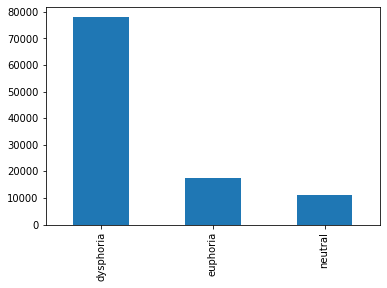

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

       label  count
0  dysphoria  77878
1   euphoria  17386
2    neutral  11237


In [ ]:
print(train_data.isnull().values.any())

True


In [ ]:
print(train_data.isnull().sum())

document    1
label       0
dtype: int64


In [ ]:
train_data.loc[train_data.document.isnull()]

,document,label
102831,NaN,euphoria


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
print(len(train_data))

106500


In [ ]:
# 한글과 공백을 제외하고 모두 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,document,label
0,야 전화 받아 아무리 바빠도 내전화는 받아야 되는거 아냐 약속 하나도 못지키는 주제...,dysphoria
1,우리 아무래도 안되겠다 이게 최선인거 같애 평생 잊지 않을게 행복하길 바란다,dysphoria
2,김경사님 아직 안가셨어요 시간 다됐을텐데,neutral
3,근무중인데 어딜가,dysphoria
4,다녀오세요 이런날은 무조건 가서 축하해주셔야죠 이순경이 대신 근무선다고 나온대요,euphoria


In [ ]:
train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


document    2
label       0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
train_data.loc[train_data.document.isnull()][:5]

,document,label
4267,NaN,dysphoria
4623,NaN,dysphoria


In [ ]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

106498


In [ ]:
# test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
# test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
# test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
# test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
# test_data = test_data.dropna(how='any') # Null 값 제거
# print('전처리 후 테스트용 샘플의 개수 :',len(test_data))


# 3) 토큰화

토큰화를 진행해봅시다. 토큰화 과정에서 불용어를 제거하겠습니다. 불용어는 정의하기 나름인데, 한국어의 조사, 접속사 등의 보편적인 불용어를 사용할 수도 있겠지만 결국 풀고자 하는 문제의 데이터를 지속 검토하면서 계속해서 추가하는 경우 또한 많습니다. 실제 현업인 상황이라면 일반적으로 아래의 불용어보다 더 많은 불용어를 사용할 수 있습니다.

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [ ]:
X_train = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 106498/106498 [04:58<00:00, 356.87it/s]


In [ ]:
print(X_train[:3])

[['야', '전화', '받다', '아무리', '바쁘다', '내', '전화', '받다', '되다', '알다', '약속', '하나', '못', '지키다', '주제', '법', '을', '지키다'], ['우리', '아무래도', '안되다', '게', '최선', '인거', '같다', '애', '평생', '잊다', '않다', '행복하다', '바라다'], ['김', '경사', '님', '아직', '안', '가다', '시간', '다', '돼다']]


In [ ]:
# X_test = []
# for sentence in tqdm(test_data['document']):
#     tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
#     stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
#     X_test.append(stopwords_removed_sentence)

# 4) 정수 인코딩

기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩을 수행해야 합니다. 우선, 훈련 데이터에 대해서 단어 집합(vocaburary)을 만들어봅시다.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer.word_index)

{'을': 1, '나': 2, '내': 3, '있다': 4, '너무': 5, '것': 6, '같다': 7, '친구': 8, '보다': 9, '없다': 10, '안': 11, '않다': 12, '되다': 13, '그렇다': 14, '좋다': 15, '못': 16, '에서': 17, '말': 18, '사람': 19, '이야': 20, '만': 21, '거': 22, '생각': 23, '그': 24, '들다': 25, '싶다': 26, '게': 27, '받다': 28, '모르다': 29, '돼다': 30, '더': 31, '다': 32, '자다': 33, '나다': 34, '때': 35, '에게': 36, '가다': 37, '아니다': 38, '돈': 39, '하고': 40, '일': 41, '한테': 42, '수': 43, '고': 44, '많이': 45, '정말': 46, '이제': 47, '로': 48, '어떻다': 49, '걱정': 50, '회사': 51, '힘들다': 52, '우리': 53, '뭐': 54, '응': 55, '나르다': 56, '해': 57, '먹다': 58, '오다': 59, '요즘': 60, '야': 61, '마음': 62, '때문': 63, '많다': 64, '오늘': 65, '적': 66, '엄마': 67, '집': 68, '아내': 69, '결혼': 70, '스럽다': 71, '남편': 72, '나오다': 73, '기분': 74, '왜': 75, '아프다': 76, '맞다': 77, '지금': 78, '이번': 79, '랑': 80, '난': 81, '화가': 82, '애': 83, '인데': 84, '라고': 85, '슬프다': 86, '나이': 87, '알다': 88, '주다': 89, '거야': 90, '어': 91, '준비': 92, '근데': 93, '이렇게': 94, '까지': 95, '다른': 96, '일이': 97, '아': 98, '해주다': 99, '걸': 100, '이다': 101, '그냥': 102, '막': 

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 16162
등장 빈도가 2번 이하인 희귀 단어의 수: 6975
단어 집합에서 희귀 단어의 비율: 43.156787526296256
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.7970579879415386


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 9188


In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
# X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[61, 377, 28, 529, 300, 3, 377, 28, 13, 88, 453, 148, 16, 732, 2277, 1624, 1, 732], [53, 504, 573, 27, 1505, 3631, 7, 83, 543, 967, 12, 343, 1030], [441, 2000, 172, 164, 11, 37, 132, 32, 30]]


In [ ]:
def to_num(label):
  if label == 'dysphoria':
    label = 0
    return 0 
  elif label == 'neutral':
    label = 1
    return 1
  elif label == 'euphoria':
    return 2

Y_train_tonum = train_data['label'].apply(to_num)  
Y_train_tonum

0         0
1         0
2         1
3         0
4         2
         ..
112024    1
112025    1
112026    1
112027    1
112028    1
Name: label, Length: 106498, dtype: int64

In [ ]:
Y_train = np.array(Y_train_tonum)
# y_test = np.array(test_data['label'])

# 5) 빈 샘플 제거

전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 빈도수가 낮은 단어만으로 구성되었던 샘플들은 빈(empty) 샘플이 되었다는 것을 의미합니다. 빈 샘플들은 어떤 레이블이 붙어있던 의미가 없으므로 빈 샘플들을 제거해주는 작업을 하겠습니다. 각 샘플들의 길이를 확인해서 길이가 0인 샘플들의 인덱스를 받아오겠습니다.

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
# 빈 샘플들을 제거
train_x = np.delete(X_train, drop_train, axis=0)
train_y = np.delete(Y_train, drop_train, axis=0)
print(len(train_x))
print(len(train_y))
# len(np.delete(Y_train, drop_train, axis=0))

106465
106465


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


# 6) 패딩

서로 다른 길이의 샘플들의 길이를 동일하게 맞춰주는 패딩 작업을 진행해보겠습니다. 전체 데이터에서 가장 길이가 긴 리뷰와 전체 데이터의 길이 분포를 알아보겠습니다.

리뷰의 최대 길이 : 105
리뷰의 평균 길이 : 10.6232417510188


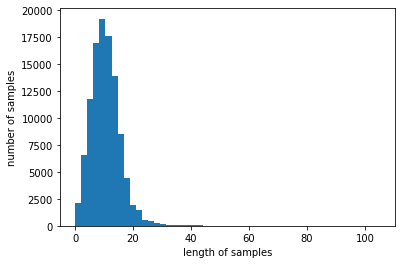

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 20
below_threshold_len(max_len, train_x)

전체 샘플 중 길이가 20 이하인 샘플의 비율: 96.73132015216268


In [ ]:
train_x_pad = pad_sequences(train_x, maxlen=max_len)
# X_test = pad_sequences(X_test, maxlen=max_len)

## 2. CNN-LSTM 네이버 영화 리뷰 감성 분석하기

하이퍼파라미터인 임베딩 벡터의 차원은 100, 은닉 상태의 크기는 128입니다. 모델은 다 대 일 구조의 LSTM을 사용합니다. 해당 모델은 마지막 시점에서 두 개의 선택지 중 하나를 예측하는 이진 분류 문제를 수행하는 모델입니다. 이진 분류 문제의 경우, 출력층에 로지스틱 회귀를 사용해야 하므로 활성화 함수로는 시그모이드 함수를 사용하고, 손실 함수로 크로스 엔트로피 함수를 사용합니다. 하이퍼파라미터인 배치 크기는 64이며, 15 에포크를 수행합니다.

EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)는 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 4회 증가하면 정해진 에포크가 도달하지 못하였더라도 학습을 조기 종료(Early Stopping)한다는 의미입니다. ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다. validation_split=0.2을 사용하여 훈련 데이터의 20%를 검증 데이터로 분리해서 사용하고, 검증 데이터를 통해서 훈련이 적절히 되고 있는지 확인합니다. 검증 데이터는 기계가 훈련 데이터에 과적합되고 있지는 않은지 확인하기 위한 용도로 사용됩니다.

In [ ]:
train_x_pad.shape, train_y.shape

((106465, 20), (106465,))

In [ ]:
train_y

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,  y_test = train_test_split(train_x_pad, train_y, test_size = 0.3, random_state= 7777777, stratify= train_y)
x_train.shape, y_train.shape

((74525, 20), (74525,))

In [ ]:

from tensorflow.keras.layers import Embedding, Dense, LSTM, InputLayer, Dropout, Activation, TimeDistributed, Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(1200, 100))
model.add(Conv1D(128, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(layers.Bidirectional(LSTM(128, dropout=0.25, recurrent_dropout=0.25)))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=30, callbacks=[es, mc], batch_size=32, validation_data=(x_test, y_test))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         120000    
                                                                 
 conv1d_2 (Conv1D)           (None, None, 128)         64128     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 128)        0         
 1D)                                                             
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
 activation_2 (Activation)   (None, 3)                

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도(loss, acc): " , loaded_model.evaluate(x_test, y_test))

886/886 [==============================] - 6s 5ms/step - loss: 0.2867 - acc: 0.8906

 테스트 정확도: 0.8906
886/886 [==============================] - 4s 5ms/step - loss: 0.2867 - acc: 0.8906
[0.28665339946746826, 0.8905941247940063]


In [ ]:
import pandas as pd
raw_data = pd.read_excel('/content/gdrive/MyDrive/대회/감정분석 대회/train_label_data.xlsx')
# test_data = pd.read_table('ratings_test.txt')

raw_data


,sentence_id,person,sentence,scene,context,label
0,1,어영,야! 전화 받아. 아무리 바빠도 내전화는 받아야 되는거 아냐? 약속 하나도 못지키는...,S0104,NaN,dysphoria
1,2,어영,우리 아무래도 안되겠다. 이게 최선인거 같애. 평생 잊지 않을게. 행복하길 바란다.,S0108,"포기한듯 탁 일어서는데, 띵동 문자. 후다닥 보는 어영. 기막혀 읽어보는",dysphoria
2,3,지구대,"김경사님, 아직 안가셨어요? 시간 다됐을텐데.",S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,neutral
3,4,순경,근무중인데 어딜가?,S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,dysphoria
4,5,지구대,다녀오세요. 이런날은 무조건 가서 축하해주셔야죠. 이순경이 대신 근무선다고 나온대요.,S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,euphoria
...,...,...,...,...,...,...
7334,12285,청난,종남이 맛있는것도 사주고 잘 챙겨줘.,S3576,NaN,euphoria
7335,12286,건강,걱정마라. 먹어도 같이 먹고 굶어도 같이 굶는다.,S3576,NaN,euphoria
7336,12287,종남,아빠. 우리 저거 타.,S3576,NaN,euphoria
7337,12288,건강,"나 못타는데. 한번도 안타봤어. 툭하면 차멀미까지 하는데, 봐라, 너도 내몸땡이에 ...",S3576,NaN,euphoria


In [ ]:
kerc_x = train_x_pad[:7339]
kerc_y = train_y[:7339]

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도(loss, acc): " , loaded_model.evaluate(kerc_x , kerc_y))

230/230 [==============================] - 2s 7ms/step - loss: 0.8385 - acc: 0.6630

 테스트 정확도(loss, acc):  [0.8384918570518494, 0.663033127784729]


In [ ]:

from tensorflow.keras.layers import Embedding, Dense, LSTM, InputLayer, Dropout, Activation, TimeDistributed, Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(1200, embedding_dim))
model.add(Conv1D(128, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(Dropout(0.25))
model.add(layers.Dense(10))
model.add(layers.Dense(3))
model.add(Activation('softmax'))
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=40, callbacks=[es, mc], batch_size=32, validation_data=(x_test, y_test))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         120000    
                                                                 
 conv1d_2 (Conv1D)           (None, None, 128)         64128     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 128)        0         
 1D)                                                             
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

1527/1527 [==============================] - 6s 4ms/step - loss: 0.4769 - acc: 0.7535

 테스트 정확도: 0.7535


In [ ]:
import pandas as pd
raw_data = pd.read_excel('/content/gdrive/MyDrive/대회/감정분석 대회/train_label_data.xlsx')
# test_data = pd.read_table('ratings_test.txt')

raw_data

,sentence_id,person,sentence,scene,context,label
0,1,어영,야! 전화 받아. 아무리 바빠도 내전화는 받아야 되는거 아냐? 약속 하나도 못지키는...,S0104,NaN,dysphoria
1,2,어영,우리 아무래도 안되겠다. 이게 최선인거 같애. 평생 잊지 않을게. 행복하길 바란다.,S0108,"포기한듯 탁 일어서는데, 띵동 문자. 후다닥 보는 어영. 기막혀 읽어보는",dysphoria
2,3,지구대,"김경사님, 아직 안가셨어요? 시간 다됐을텐데.",S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,neutral
3,4,순경,근무중인데 어딜가?,S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,dysphoria
4,5,지구대,다녀오세요. 이런날은 무조건 가서 축하해주셔야죠. 이순경이 대신 근무선다고 나온대요.,S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,euphoria
...,...,...,...,...,...,...
7334,12285,청난,종남이 맛있는것도 사주고 잘 챙겨줘.,S3576,NaN,euphoria
7335,12286,건강,걱정마라. 먹어도 같이 먹고 굶어도 같이 굶는다.,S3576,NaN,euphoria
7336,12287,종남,아빠. 우리 저거 타.,S3576,NaN,euphoria
7337,12288,건강,"나 못타는데. 한번도 안타봤어. 툭하면 차멀미까지 하는데, 봐라, 너도 내몸땡이에 ...",S3576,NaN,euphoria


In [ ]:
kerc_x = train_x_pad[:7339]
kerc_y = train_y[:7339]

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도(loss, acc): " , loaded_model.evaluate(kerc_x , kerc_y))

230/230 [==============================] - 2s 6ms/step - loss: 0.7506 - acc: 0.6715

 테스트 정확도(loss, acc):  [0.7506495714187622, 0.6714811325073242]


In [ ]:

from tensorflow.keras.layers import Embedding, Dense, LSTM, InputLayer, Dropout, Activation, TimeDistributed, Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(1200, embedding_dim))
model.add(Conv1D(128, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(Dropout(0.25))
model.add(layers.Dense(10))
model.add(layers.Dense(3))
model.add(Activation('softmax'))
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=40, callbacks=[es, mc], batch_size=32, validation_data=(x_test, y_test))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         120000    
                                                                 
 conv1d_3 (Conv1D)           (None, None, 128)         64128     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 128)        0         
 1D)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

1527/1527 [==============================] - 6s 4ms/step - loss: 0.4769 - acc: 0.7535

 테스트 정확도: 0.7535


In [ ]:
import pandas as pd
raw_data = pd.read_excel('/content/gdrive/MyDrive/대회/감정분석 대회/train_label_data.xlsx')
# test_data = pd.read_table('ratings_test.txt')

raw_data

,sentence_id,person,sentence,scene,context,label
0,1,어영,야! 전화 받아. 아무리 바빠도 내전화는 받아야 되는거 아냐? 약속 하나도 못지키는...,S0104,NaN,dysphoria
1,2,어영,우리 아무래도 안되겠다. 이게 최선인거 같애. 평생 잊지 않을게. 행복하길 바란다.,S0108,"포기한듯 탁 일어서는데, 띵동 문자. 후다닥 보는 어영. 기막혀 읽어보는",dysphoria
2,3,지구대,"김경사님, 아직 안가셨어요? 시간 다됐을텐데.",S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,neutral
3,4,순경,근무중인데 어딜가?,S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,dysphoria
4,5,지구대,다녀오세요. 이런날은 무조건 가서 축하해주셔야죠. 이순경이 대신 근무선다고 나온대요.,S0109,초조하게 시계보면서 왔다갔다 서성이는 김순경. 순찰차(경차)와서 멈추고 내리는 지구대,euphoria
...,...,...,...,...,...,...
7334,12285,청난,종남이 맛있는것도 사주고 잘 챙겨줘.,S3576,NaN,euphoria
7335,12286,건강,걱정마라. 먹어도 같이 먹고 굶어도 같이 굶는다.,S3576,NaN,euphoria
7336,12287,종남,아빠. 우리 저거 타.,S3576,NaN,euphoria
7337,12288,건강,"나 못타는데. 한번도 안타봤어. 툭하면 차멀미까지 하는데, 봐라, 너도 내몸땡이에 ...",S3576,NaN,euphoria


In [ ]:
kerc_x = train_x_pad[:7339]
kerc_y = train_y[:7339]

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도(loss, acc): " , loaded_model.evaluate(kerc_x , kerc_y))

230/230 [==============================] - 2s 4ms/step - loss: 0.8429 - acc: 0.6010

 테스트 정확도(loss, acc):  [0.8429270386695862, 0.6010355353355408]
